# Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.weightstats as statsmod

# Problem 1 : LINEAR REGRESSION

GEM STONES CO LTD


You are hired by a company named Gem Stones Co Ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of approximately 27,000 pieces of cubic zirconia (which is an inexpensive synthesized diamond alternative with similar qualities of a diamond).

Your objective is to accurately predict prices of the zircon pieces. Since the company profits at a different rate at different price levels, for revenue management, it is important that prices are predicted as accurately as possible. At the same time, it is important to understand which of the predictors are more important in determining the price.

## Data Dictionary

1. <b>Carat:</b> Carat weight of the cubic zirconia. 
2. <b>Cut:</b> Describes the cut quality of the cubic zirconia. Quality is in increasing order: Fair, Good, Very Good, Premium, Ideal. 
3. <b>Color:</b> Colour of the cubic zirconia.  
4. <b>Clarity:</b> Cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
5. <b>Depth:</b> The Height of a cubic zirconia piece, measured from the Culet to the table, divided by its average Girdle Diameter.  
6. <b>Table:</b> The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.  
7. <b>Price:</b> Price of the cubic zirconia.  
8. <b>X:</b> Length of the cubic zirconia in mm.
9. <b>Y:</b> number of working hours per week  
10. <b>Z:</b> Height of the cubic zirconia in mm. 

## Read the data

In [2]:
df= pd.read_csv('cubic_zirconia.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


## 1. The very first step of any data analysis assignment is to do the exploratory data analysis (EDA). Once you have understood the nature of all the variables, identified the response and the predictors, apply appropriate methods to determine whether there is any duplicate observation or missing data and whether the variables have symmetric or skewed distribution. Note that data may contain various types of attributes and numerical and/or visual data summarization techniques need to be appropriately decided. Both univariate and bivariate analyses and pre-processing of data are important. Check for outliers and comment on removing or keeping them while model building. Since this is a regression problem, the dependence of the response on the predictors needs to be thoroughly investigated.

# Basic Exploratory Data Analysis

### Copy of the data

In [3]:
data=df.copy()
data.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [4]:
data.tail(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26957,26958,2.09,Premium,H,SI2,60.6,59.0,8.27,8.22,5.00,17805
26958,26959,1.37,Premium,E,SI2,61.0,57.0,7.25,7.19,4.40,6751
26959,26960,1.05,Very Good,E,SI2,63.2,59.0,6.43,6.36,4.04,4281
26960,26961,1.10,Very Good,D,SI2,NaN,63.0,6.76,6.69,3.94,4361
26961,26962,0.25,Premium,F,VVS2,62.0,59.0,4.04,3.99,2.49,740
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


### Check for datatype

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
Unnamed: 0    26967 non-null int64
carat         26967 non-null float64
cut           26967 non-null object
color         26967 non-null object
clarity       26967 non-null object
depth         26270 non-null float64
table         26967 non-null float64
x             26967 non-null float64
y             26967 non-null float64
z             26967 non-null float64
price         26967 non-null int64
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [6]:
data.shape
print('The number of rows (observations) is:',df.shape[0],'\n''The number of columns(variables) is:',df.shape[1])

The number of rows (observations) is: 26967 
The number of columns(variables) is: 11


### Check for duplicate data across columns and drop those

In [7]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


Comments : The data doesn't include any duplicate rows

## Drop unnecessary columns

In [8]:
#We are dropping column "Unnamed"
data=data.drop(['Unnamed: 0'], axis=1)
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


### Check for missing values and impute the missing values, if any is present.

In [9]:
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

We have 697 missing values in the variable "depth".

In [10]:
#median
data['depth'].median()

61.8

In [11]:
#mean
data['depth'].mean()

61.745146555006194

In [12]:
#standard deviation
data['depth'].std()

1.4128602381425932

Text(0.5, 1.0, 'depth Distribution')

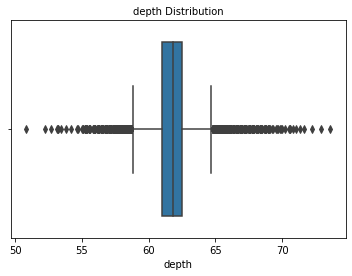

In [13]:
a=sns.boxplot(data['depth'])
a.set_title("depth Distribution",fontsize=10)

Comments : Median and mean are quite close so we are imputing the value with the median

In [14]:
#impute depth missing value with median
data['depth'].fillna(value=(data['depth']).median(),inplace=True)

### Descriptive statistics

In [15]:
data.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26967,NaN,NaN,NaN,61.7466,1.39451,50.8,61.1,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


#### Coefficient of variation calculation

In [16]:
def coeff_variation(num_column):
    print("Coefficient of variation of " + num_column + " is :",(data[num_column].std()/data[num_column].mean()))

In [17]:
df_num = data.select_dtypes(include = ['int64','float64']) 
lstnumcolumns = list(df_num.columns.values)
lstnumcolumns

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

In [18]:
for x in lstnumcolumns:
    coeff_variation(x)

Coefficient of variation of carat is : 0.5983970203652024
Coefficient of variation of depth is : 0.02258439029334898
Coefficient of variation of table is : 0.038848245869077404
Coefficient of variation of x is : 0.19695379171339897
Coefficient of variation of y is : 0.20337377457491598
Coefficient of variation of z is : 0.20367777389441802
Coefficient of variation of price is : 1.021664210803864


### Skewness

In [19]:
data.skew()

carat    1.116481
depth   -0.032042
table    0.765758
x        0.387986
y        3.850189
z        2.568257
price    1.618550
dtype: float64

In [20]:
#Characteristics of the less expensive jewellery
data.loc[data['price'].idxmin()]

carat       0.23
cut        Ideal
color          E
clarity      SI2
depth       61.5
table         55
x           3.95
y           3.98
z           2.43
price        326
Name: 6484, dtype: object

In [21]:
#Characteristics of the most expensive jewellery
data.loc[data['price'].idxmax()]

carat              2
cut        Very Good
color              G
clarity          SI1
depth           63.5
table             56
x                7.9
y               7.97
z               5.04
price          18818
Name: 2590, dtype: object

# Univariate analysis

### Categorical variables

##### Define Function for univariate analysis of categorical variables

In [22]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(data[cat_column].value_counts())
    fig_dims=(15,20)
    sns.countplot(x=cat_column, data=data, palette='pastel')
    plt.show()
    print("       ")

In [23]:
df_cat = data.select_dtypes(include = ['object']) 
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['cut', 'color', 'clarity']

Details of cut
----------------------------------------------------------------
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64


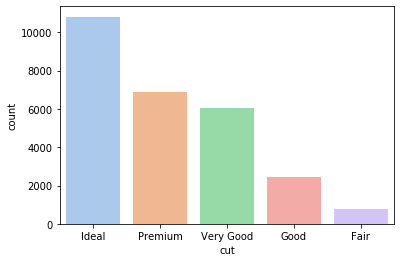

       
Details of color
----------------------------------------------------------------
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64


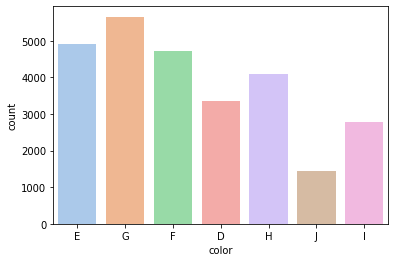

       
Details of clarity
----------------------------------------------------------------
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64


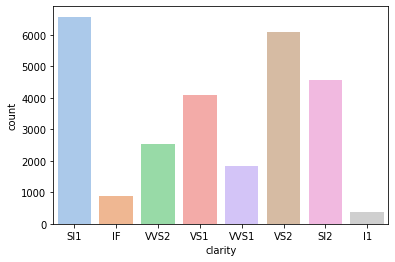

In [24]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

### Numerical Variables

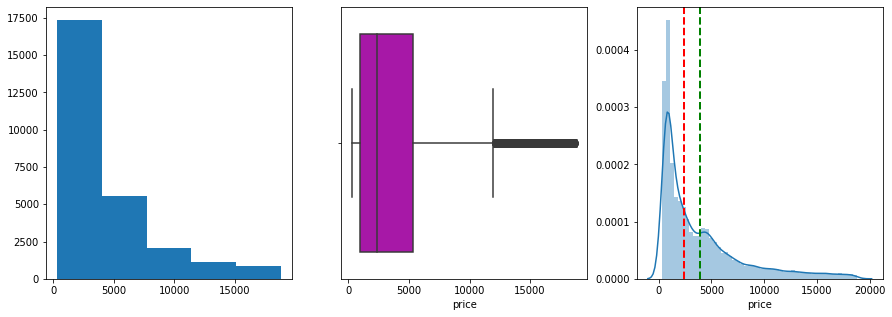

In [25]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=fig_dims)
axs[0].hist(x='price', data=data,bins = 5)
sns.boxplot (x= 'price', data=data, color = 'm',ax=axs[1],orient="h")
sns.distplot(data['price'], kde=True, ax=axs[2])
plt.axvline(df["price"].mean(), linestyle='dashed', linewidth=2,c="g",label="Mean")
plt.axvline(df["price"].median(), linestyle='dashed', linewidth=2,c="r",label="Median")

In [26]:
 #checking for the normality
stats.shapiro(data['price'])

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.7956799268722534, 0.0)

In [27]:
#Check the numbers of rows with a price more than 3 std
z = np.abs(stats.zscore(data['price']))
threshold = 3
d=np.where(z > threshold)
d[0].shape

(582,)

Text(0.5, 1.0, 'x Distribution')

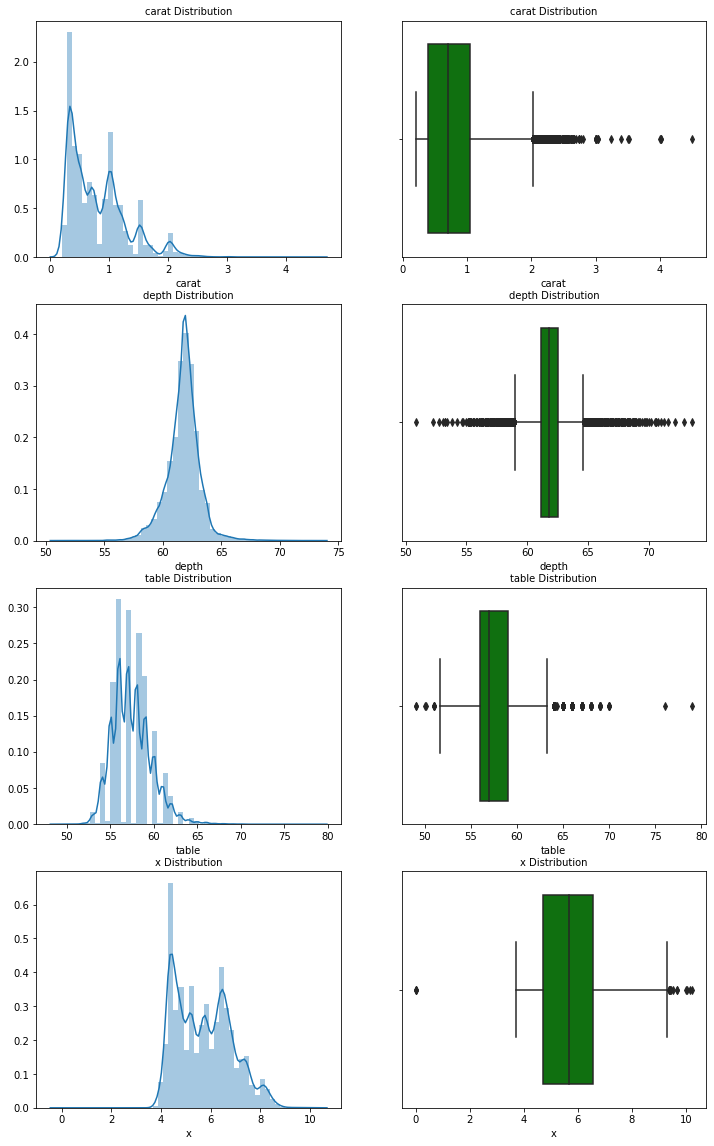

In [28]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(data['carat'] , ax=axes[0][0])
a.set_title("carat Distribution",fontsize=10)
a = sns.boxplot(data['carat'] , orient = "h" ,color="g", ax=axes[0][1])
a.set_title("carat Distribution",fontsize=10)

a = sns.distplot(data['depth'] , ax=axes[1][0])
a.set_title("depth Distribution",fontsize=10)

a = sns.boxplot(data['depth'] , orient = "h" ,color ="g", ax=axes[1][1])
a.set_title("depth Distribution",fontsize=10)

a = sns.distplot(data['table'] , ax=axes[2][0])
a.set_title("table Distribution",fontsize=10)

a = sns.boxplot(data['table'] , orient = "h" ,color="g", ax=axes[2][1])
a.set_title("table Distribution",fontsize=10)

a = sns.distplot(data['x'] , ax=axes[3][0])
a.set_title("x Distribution",fontsize=10)

a = sns.boxplot(data['x'] , orient = "h" ,color="g", ax=axes[3][1])
a.set_title("x Distribution",fontsize=10)

Text(0.5, 1.0, 'z Distribution')

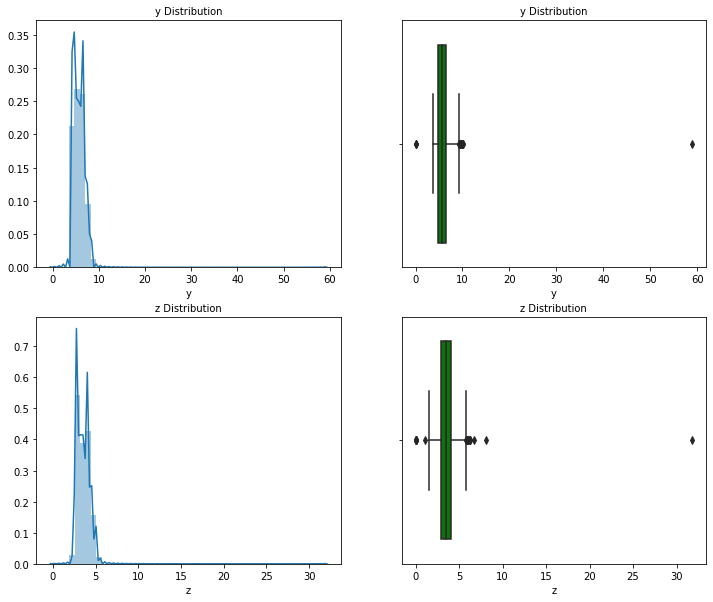

In [29]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
a = sns.distplot(data['y'] , ax=axes[0][0])
a.set_title("y Distribution",fontsize=10)
a = sns.boxplot(data['y'] , orient = "h" ,color="g", ax=axes[0][1])
a.set_title("y Distribution",fontsize=10)

a = sns.distplot(data['z'] , ax=axes[1][0])
a.set_title("z Distribution",fontsize=10)

a = sns.boxplot(data['z'] , orient = "h" ,color ="g", ax=axes[1][1])
a.set_title("z Distribution",fontsize=10)

### Check the spread of the data using boxplot for the continuous variables.

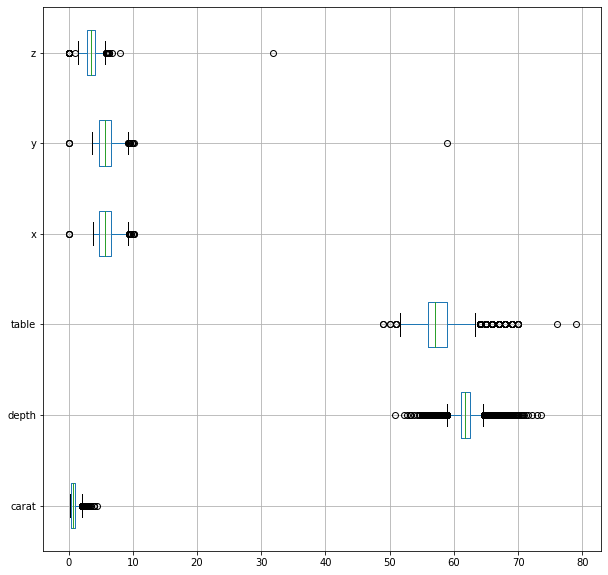

In [30]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
data.iloc[:, 0:9].boxplot(vert=0)
plt.show()

Comments : The data presents outliers in each numerical variable.

# Bivariate Analysis

In [31]:
#Average per color
data.groupby('color').mean().round(2)

,carat,depth,table,x,y,z,price
color,,,,,,,
D,0.66,61.71,57.37,5.42,5.42,3.34,3185.96
E,0.66,61.66,57.52,5.40,5.41,3.34,3073.95
F,0.73,61.68,57.44,5.60,5.60,3.45,3699.88
G,0.77,61.75,57.30,5.68,5.68,3.50,4002.69
H,0.91,61.83,57.48,5.98,5.99,3.69,4486.71
I,1.03,61.87,57.57,6.24,6.24,3.86,5129.83
J,1.16,61.90,57.79,6.51,6.51,4.03,5331.45


In [32]:
#Average per cut
data.groupby('cut').mean().round(2)

,carat,depth,table,x,y,z,price
cut,,,,,,,
Fair,1.06,63.88,59.30,6.29,6.22,3.99,4579.25
Good,0.85,62.36,58.70,5.84,5.86,3.64,3930.58
Ideal,0.70,61.71,55.96,5.50,5.51,3.40,3454.12
Premium,0.89,61.28,58.71,5.97,5.94,3.64,4548.26
Very Good,0.81,61.82,57.96,5.75,5.78,3.57,4034.46


In [33]:
#Average per clarity
data.groupby('clarity').mean().round(2)

,carat,depth,table,x,y,z,price
clarity,,,,,,,
I1,1.28,62.59,58.38,6.76,6.71,4.19,3906.55
IF,0.49,61.51,56.45,4.94,4.96,3.04,2734.22
SI1,0.85,61.85,57.64,5.88,5.89,3.64,3998.16
SI2,1.08,61.78,57.91,6.41,6.41,3.96,5095.00
VS1,0.73,61.67,57.32,5.57,5.57,3.44,3838.88
VS2,0.77,61.72,57.43,5.67,5.67,3.50,3968.76
VVS1,0.50,61.63,56.91,4.95,4.96,3.05,2502.87
VVS2,0.59,61.66,57.06,5.21,5.22,3.21,3265.28


In [34]:
#headcount of products per color and clarity
pd.crosstab(data['color'],data['clarity'] )

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
color,,,,,,,,
D,25,38,1040,671,369,804,121,276
E,54,87,1249,849,625,1202,342,509
F,67,183,1088,753,672,1107,360,499
G,68,342,1001,779,1078,1205,507,681
H,82,149,1082,796,595,804,288,306
I,48,69,725,469,480,603,183,194
J,21,26,386,258,274,374,38,66


In [35]:
#Average price per color and clarity
(pd.pivot_table(data,'price', index=['color'],columns=[ 'clarity'])).round(2)

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
color,,,,,,,,
D,3500.92,6821.87,3070.90,4009.85,3062.81,2584.59,2680.46,3225.48
E,3411.02,3203.15,3091.53,4248.64,2895.83,2746.84,2181.34,2604.53
F,3455.36,3004.15,3801.27,4460.98,3520.94,3774.35,2829.10,3322.28
G,3345.43,2494.19,3675.14,4925.54,4170.12,4517.67,2939.86,3866.74
H,4663.27,1836.04,4992.64,6178.31,3874.87,4655.19,1731.11,2881.34
I,4157.31,1975.90,5444.26,6911.58,4845.81,5697.40,2131.20,2776.94
J,5392.14,3608.04,5318.94,6419.93,4669.53,5415.68,3549.42,5106.06


In [36]:
#Headcount of product per color and cut
pd.crosstab(data['color'],data['cut'] )

cut,Fair,Good,Ideal,Premium,Very Good
color,,,,,
D,74,311,1409,808,742
E,100,491,1966,1174,1186
F,148,454,1893,1167,1067
G,147,419,2470,1471,1154
H,150,352,1552,1161,887
I,94,253,1073,711,640
J,68,161,453,407,354


In [37]:
#Average price per color and cut
(pd.pivot_table(data,'price', index=['color'],columns=[ 'cut'])).round(2)

cut,Fair,Good,Ideal,Premium,Very Good
color,,,,,
D,4515.50,3508.89,2518.02,3665.97,3663.67
E,4156.73,3284.09,2618.79,3468.71,3259.38
F,4050.21,3532.80,3332.03,4327.65,3688.39
G,4218.76,4243.75,3757.98,4448.42,3843.26
H,5394.45,4094.26,3881.16,5168.61,4655.96
I,4817.21,5088.95,4500.28,5862.73,5433.17
J,5073.53,4845.27,4903.35,6341.40,4988.79


Text(0.5, 1.0, 'Sales per Clarity Type')

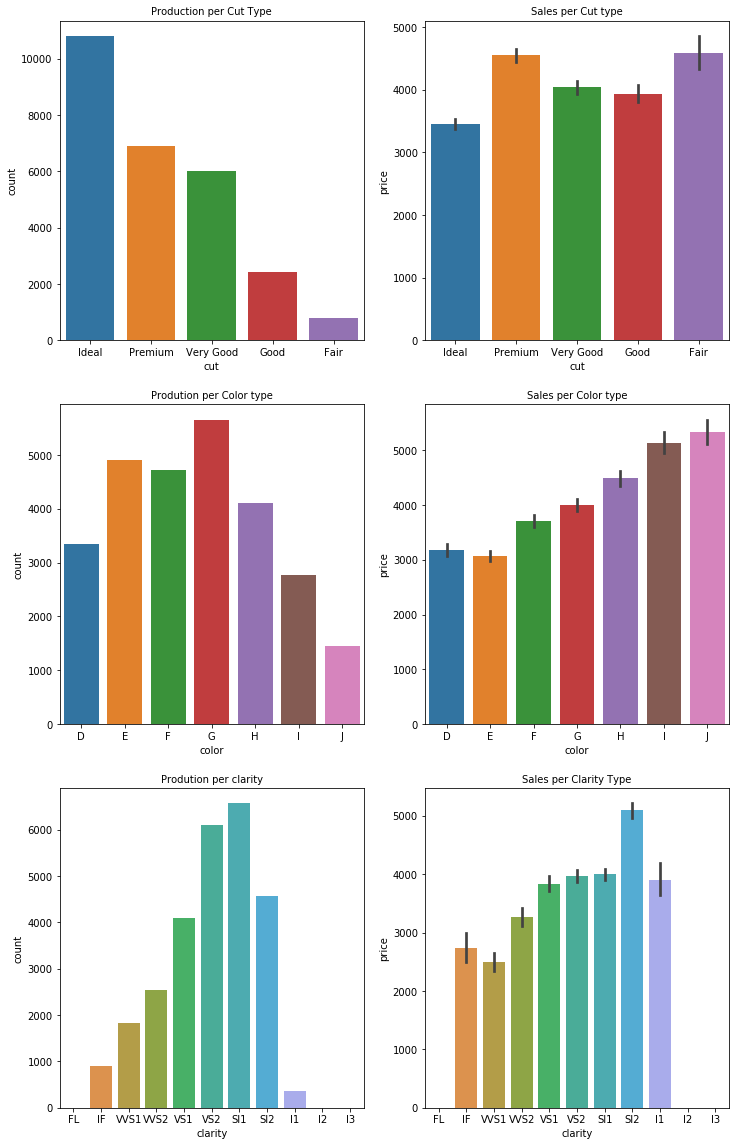

In [38]:
#Distribution according to cut
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 20)
a = sns.countplot(data['cut'] , ax=axes[0][0])
a.set_title("Production per Cut Type",fontsize=10)
a = sns.barplot(data = data, x='cut',y='price', ax=axes[0][1])
a.set_title("Sales per Cut type",fontsize=10)

a = sns.countplot(data['color'] ,order = ['D', 'E', 'F', 'G','H', 'I', 'J'], ax=axes[1][0])
a.set_title("Prodution per Color type",fontsize=10)
a = sns.barplot(data = data, x='color',y='price', order = ['D', 'E', 'F', 'G','H', 'I', 'J'],ax=axes[1][1])
a.set_title("Sales per Color type",fontsize=10)

a = sns.countplot(data['clarity'] ,order = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'], ax=axes[2][0])
a.set_title("Prodution per clarity",fontsize=10)
a = sns.barplot(data = data, x='clarity',y='price', order =['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'],ax=axes[2][1])
a.set_title("Sales per Clarity Type",fontsize=10)


color         D     E     F     G     H     I    J
cut                                               
Fair         74   100   148   147   150    94   68
Good        311   491   454   419   352   253  161
Ideal      1409  1966  1893  2470  1552  1073  453
Premium     808  1174  1167  1471  1161   711  407
Very Good   742  1186  1067  1154   887   640  354


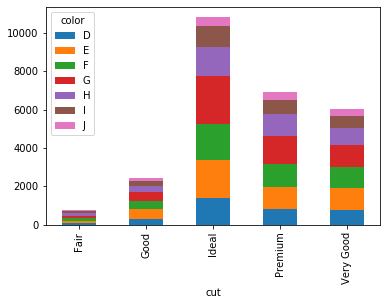

In [39]:
pn=pd.crosstab( data['cut'], data.color, margins= False)
pn.plot(kind='bar',stacked=True)
print(pn)

clarity     I1   IF   SI1   SI2   VS1   VS2  VVS1  VVS2
cut                                                    
Fair        89    4   193   225    93   129    10    38
Good        51   30   765   530   331   491   100   143
Ideal       74  613  2150  1324  1784  2528  1036  1307
Premium    108  115  1809  1449   998  1697   307   416
Very Good   43  132  1654  1047   887  1254   386   627


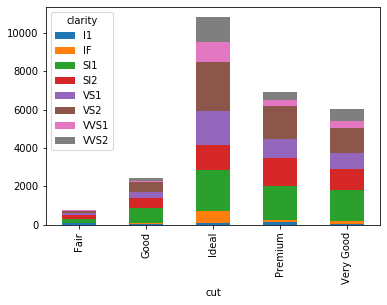

In [40]:
pn=pd.crosstab( data['cut'], data.clarity, margins= False)
pn.plot(kind='bar',stacked=True)
print(pn)

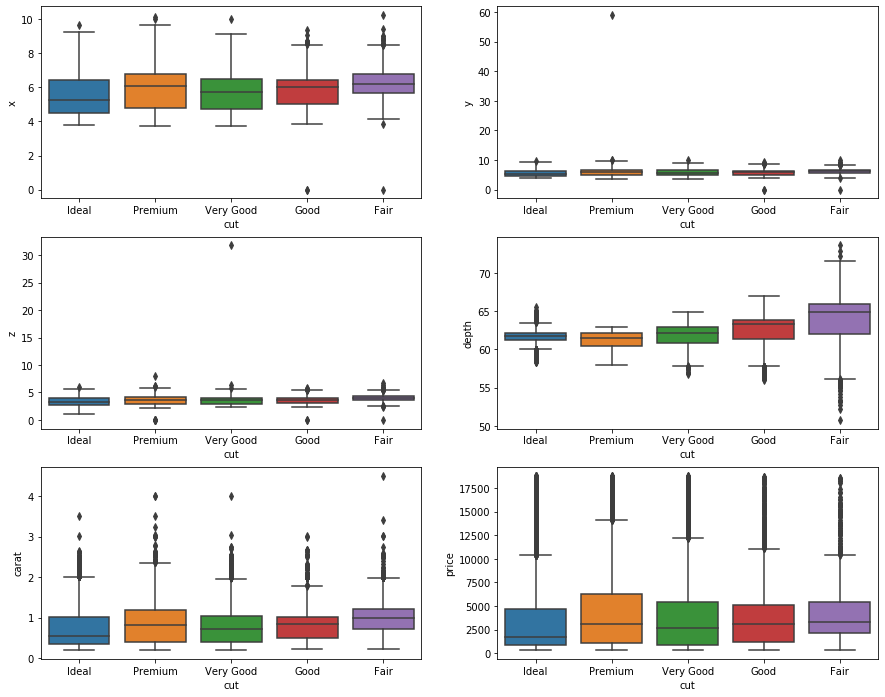

In [41]:
#distribution according to cut
fig_dims = (15, 12)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=fig_dims)
sns.boxplot(data['cut'],y=data['x'],ax=axs[0,0])
sns.boxplot(data['cut'],y=df['y'],ax=axs[0,1])
sns.boxplot(x=data['cut'],y=data['z'],ax=axs[1,0])
sns.boxplot(x=data['cut'],y=data['depth'],ax=axs[1,1])
sns.boxplot(data['cut'],y=data['carat'],ax=axs[2,0])
sns.boxplot(x=data['cut'],y=data['price'],ax=axs[2,1])

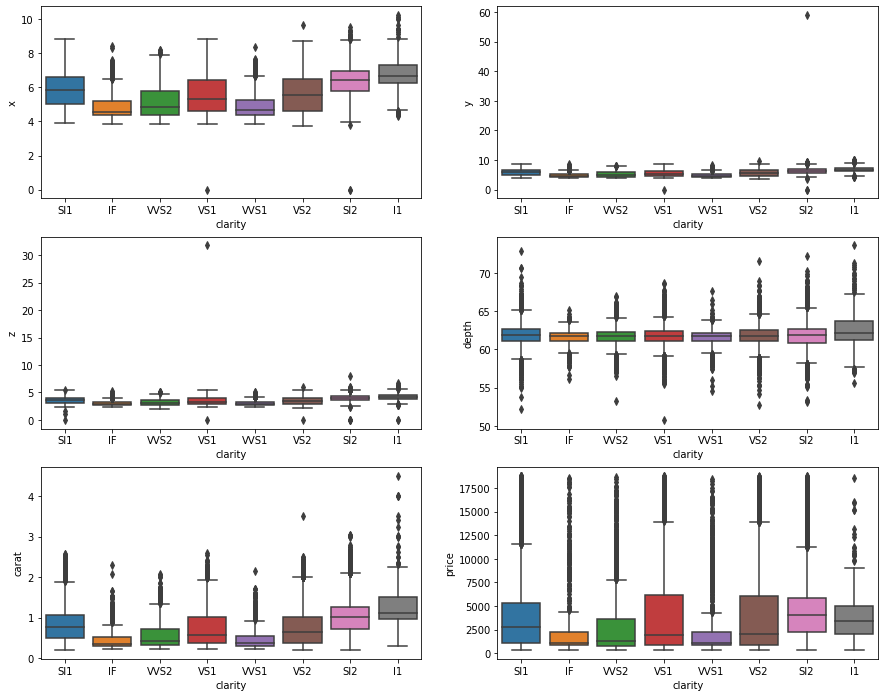

In [42]:
#distribution according to clarity
fig_dims = (15, 12)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=fig_dims)
sns.boxplot(data['clarity'],y=data['x'],ax=axs[0,0])
sns.boxplot(data['clarity'],y=df['y'],ax=axs[0,1])
sns.boxplot(x=data['clarity'],y=data['z'],ax=axs[1,0])
sns.boxplot(x=data['clarity'],y=data['depth'],ax=axs[1,1])
sns.boxplot(data['clarity'],y=data['carat'],ax=axs[2,0])
sns.boxplot(x=data['clarity'],y=data['price'],ax=axs[2,1])

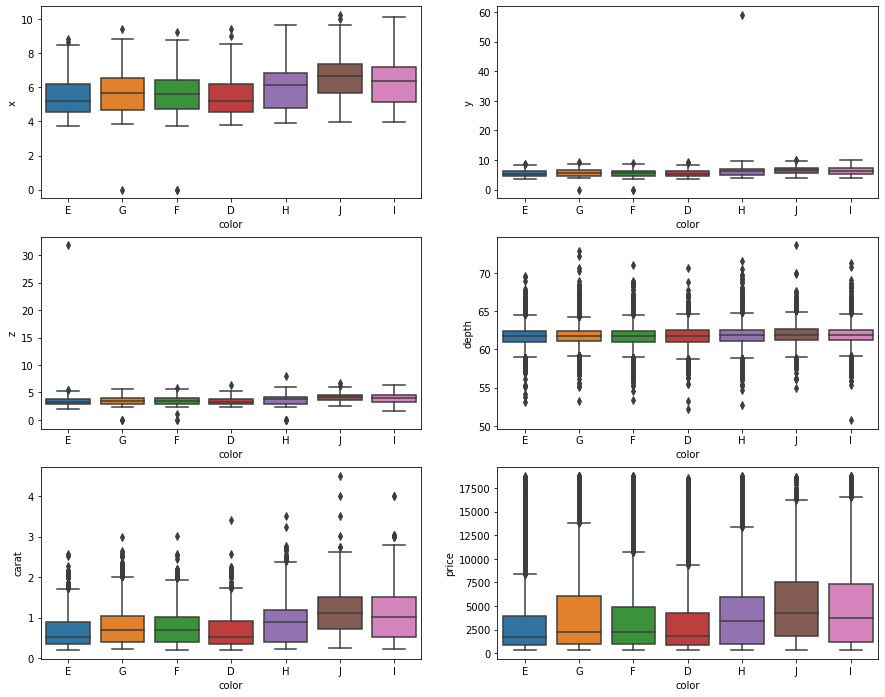

In [43]:
#distribution according to color
fig_dims = (15, 12)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=fig_dims)
sns.boxplot(data['color'],y=data['x'],ax=axs[0,0])
sns.boxplot(data['color'],y=df['y'],ax=axs[0,1])
sns.boxplot(x=data['color'],y=data['z'],ax=axs[1,0])
sns.boxplot(x=data['color'],y=data['depth'],ax=axs[1,1])
sns.boxplot(data['color'],y=data['carat'],ax=axs[2,0])
sns.boxplot(x=data['color'],y=data['price'],ax=axs[2,1])

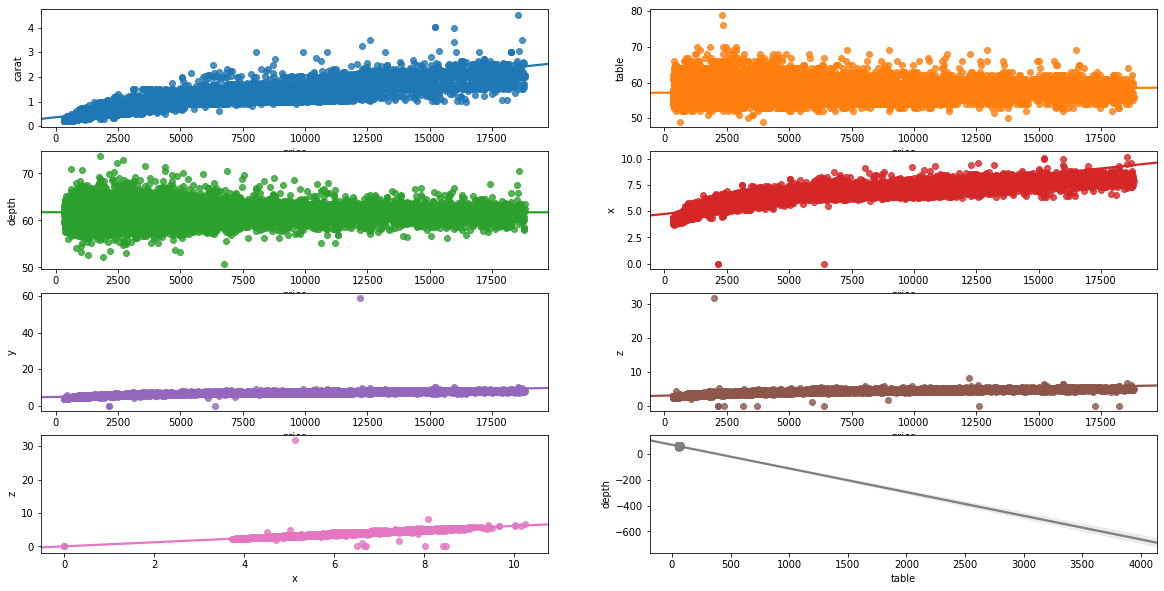

In [44]:
fig_dims = (20, 10) 
fig, axs = plt.subplots(nrows=4, ncols=2,figsize=fig_dims) 
sns.regplot(x='price',y='carat',data=data,ax=axs[0,0])
sns.regplot(x='price',y='table',data=data,ax=axs[0,1])
sns.regplot(x='price',y='depth',data=data,ax=axs[1,0])
sns.regplot(x='price',y='x',data=data,ax=axs[1,1])
sns.regplot(x='price',y='y',data=data,ax=axs[2,0])
sns.regplot(x='price',y='z',data=data,ax=axs[2,1])
sns.regplot(x='x',y='z',data=data,ax=axs[3,0])
sns.regplot(x='table',y='depth',data=data,ax=axs[3,1])

## Outliers treatment using IQR

In [45]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [46]:
#imputing table and depth
for column in data.iloc[:, 4:10].columns:
    lr,ur=remove_outlier(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])


In [47]:
#imputing table and depth
for column in data.iloc[:, 0:1].columns:
    lr,ur=remove_outlier(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])


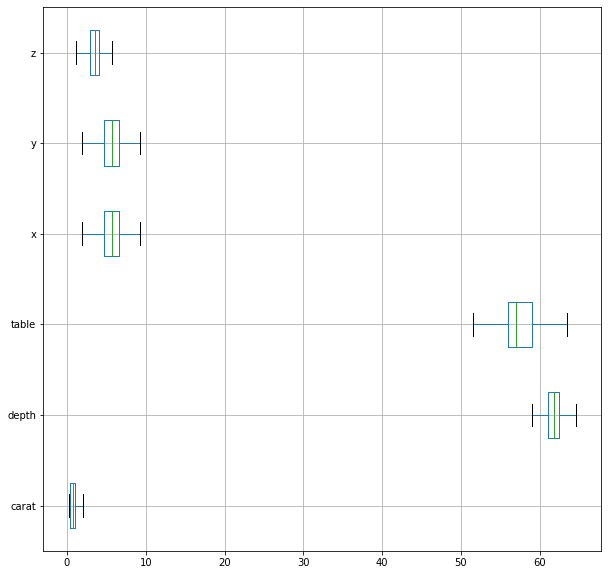

In [48]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
data.iloc[:, 0:9].boxplot(vert=0)
plt.show()

### Checking for Correlations. Print the correlation matrix and the correlation heatmap.

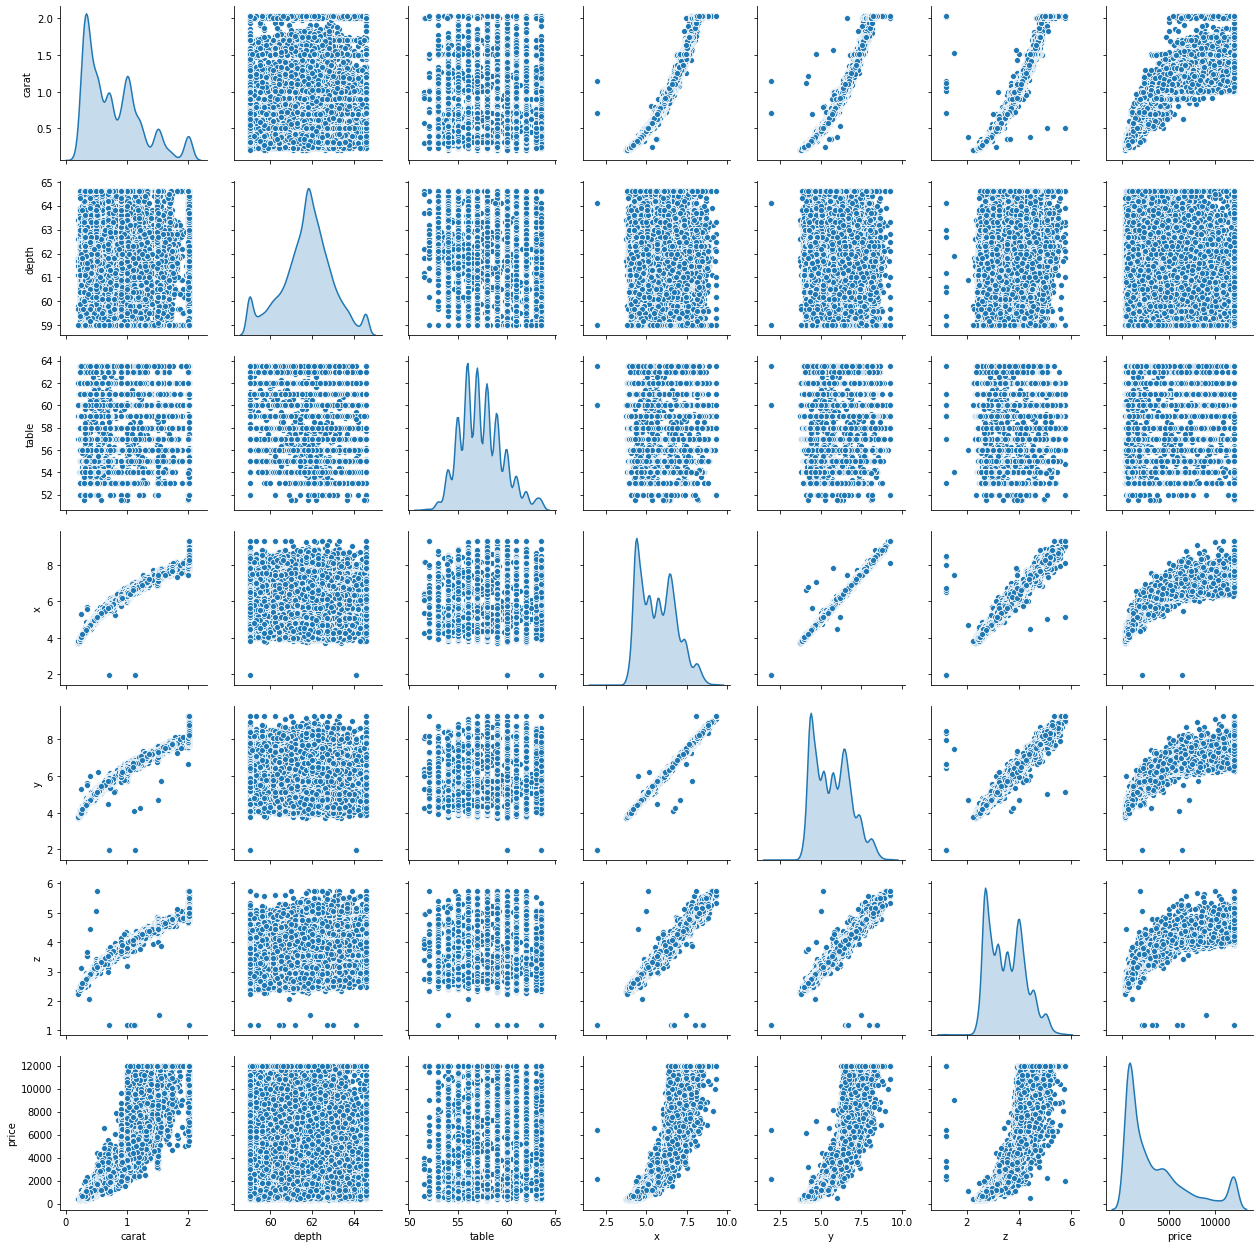

In [49]:
# Pairplot using sns
sns.pairplot(data ,diag_kind='kde')

In [50]:
cor=data.corr()
cor

,carat,depth,table,x,y,z,price
carat,1.000000,0.029528,0.187395,0.982207,0.981285,0.977328,0.936741
depth,0.029528,1.000000,-0.289564,-0.019937,-0.022966,0.095160,-0.000789
table,0.187395,-0.289564,1.000000,0.199146,0.193530,0.159425,0.137971
x,0.982207,-0.019937,0.199146,1.000000,0.998495,0.988179,0.912759
y,0.981285,-0.022966,0.193530,0.998495,1.000000,0.987853,0.914191
z,0.977328,0.095160,0.159425,0.988179,0.987853,1.000000,0.905737
price,0.936741,-0.000789,0.137971,0.912759,0.914191,0.905737,1.000000


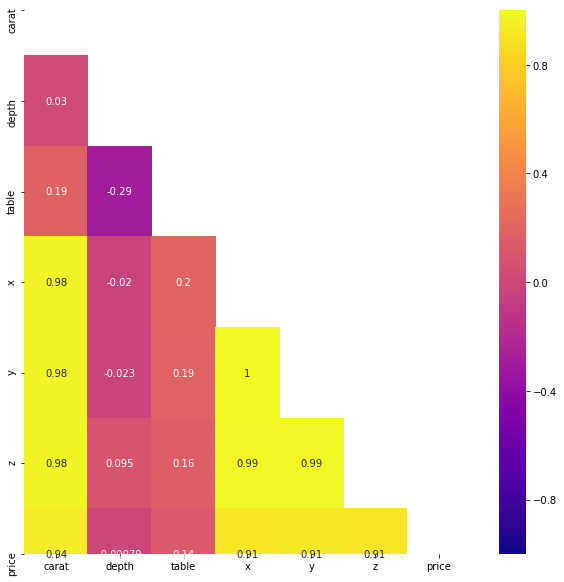

In [51]:
# View heat map of the correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cor, vmin = -1, vmax = 1, cmap = 'plasma', annot = True,mask=np.triu(cor));

Since z and y are showing highly correlation values. we can remove them from our predictions

In [52]:
#Highly correlated variables
c = cor.abs()

# Unstack the correlation matrix
s = c.unstack()

#Filter to exclude values of 1
s = s[s != 1]

# Sort descending to find the highly correlated variables
so = s.sort_values(kind="quicksort", ascending=False)[:15]
so

x      y        0.998495
y      x        0.998495
x      z        0.988179
z      x        0.988179
       y        0.987853
y      z        0.987853
x      carat    0.982207
carat  x        0.982207
y      carat    0.981285
carat  y        0.981285
z      carat    0.977328
carat  z        0.977328
       price    0.936741
price  carat    0.936741
y      price    0.914191
dtype: float64

### Plot a series of scatterplots between the continuous independent variables keeping the target variable as a hue.

Comments : 
    

# Converting categorical variables

In [53]:
## We are coding up the 'cut' variable in an ordinal manner

data['cut']=np.where(data['cut'] =='Ideal', '1', data['cut'])
data['cut']=np.where(data['cut'] =='Premium', '2', data['cut'])
data['cut']=np.where(data['cut'] =='Very Good', '3', data['cut'])
data['cut']=np.where(data['cut'] =='Good', '4', data['cut'])
data['cut']=np.where(data['cut'] =='Fair', '5', data['cut'])

In [54]:
## We are coding up the 'clarity' variable in an ordinal manner
data['clarity']=np.where(data['clarity'] =='FL', '1', data['clarity'])
data['clarity']=np.where(data['clarity'] =='IF', '2', data['clarity'])
data['clarity']=np.where(data['clarity'] =='VVS1', '3', data['clarity'])
data['clarity']=np.where(data['clarity'] =='VVS2', '4', data['clarity'])
data['clarity']=np.where(data['clarity'] =='VS1', '5', data['clarity'])
data['clarity']=np.where(data['clarity'] =='VS2', '6', data['clarity'])
data['clarity']=np.where(data['clarity'] =='SI1', '7', data['clarity'])
data['clarity']=np.where(data['clarity'] =='SI2', '8', data['clarity'])
data['clarity']=np.where(data['clarity'] =='I1', '9', data['clarity'])
data['clarity']=np.where(data['clarity'] =='I2', '10', data['clarity'])
data['clarity']=np.where(data['clarity'] =='I3', '11', data['clarity'])


In [55]:
##Converting the variable "cut" and "clarity" into numeric
data['cut'] = data['cut'].astype('int64')
data['clarity'] = data['clarity'].astype('int64')

### Scaling the data

In [56]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# get numeric data
num_d = data.select_dtypes(exclude=['object'])

# update the cols with their normalized values
data[num_d.columns] = sc.fit_transform(num_d)

In [57]:
#converting the variable 'color' as a dummy variable
df_dummy = pd.get_dummies(data,drop_first=True)
df_dummy.head()

,carat,cut,clarity,depth,table,x,y,z,price,color_E,color_F,color_G,color_H,color_I,color_J
0,-1.067407,-0.979550,0.639402,0.286730,0.261603,-1.295386,-1.288528,-1.258146,-0.933183,1,0,0,0,0,0
1,-1.002532,-0.081246,-2.396400,-0.779799,0.261603,-1.162290,-1.136600,-1.200779,-0.793447,0,0,1,0,0,0
2,0.230108,0.817058,-1.182079,0.368771,1.188780,0.275152,0.346935,0.348130,0.735009,1,0,0,0,0,0
3,-0.807904,-0.979550,-0.574919,-0.123473,-0.665574,-0.807366,-0.832743,-0.827893,-0.765211,0,1,0,0,0,0
4,-1.045782,-0.979550,-1.789239,-1.107962,0.725192,-1.224402,-1.163411,-1.272487,-0.852511,0,1,0,0,0,0


# 2.Build various iterations of the Linear Regression model using appropriate variable selection techniques for the full data.
Use Full Data to develop a model to identify significant predictors. Check whether the proposed model is free of multicollinearity. Apply variable selection method as required. Show all intermediate models leading to the final model. Justify your choice of the final model. Which are the significant predictors?

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols 

## Linear Regression models

### Model 1 : Using all the variables

In [59]:
X = df_dummy.drop(['price'], axis=1)
Y = df_dummy[['price']]

In [60]:
# invoke the LinearRegression function and find the bestfit model
regression_model_1 = LinearRegression()
regression_model_1.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
regression_model_1.coef_

array([[ 1.18264876, -0.03508543, -0.20174544, -0.00204265, -0.00665272,
        -0.48989891,  0.43055312, -0.06762003, -0.06196077, -0.08324545,
        -0.13457049, -0.25666536, -0.38298201, -0.53929499]])

In [62]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_1.coef_[0][idx]))

The coefficient for carat is 1.1826487598487985
The coefficient for cut is -0.03508542611087976
The coefficient for clarity is -0.20174544016555754
The coefficient for depth is -0.002042648275087637
The coefficient for table is -0.0066527152579181435
The coefficient for x is -0.48989891035164496
The coefficient for y is 0.43055312343892066
The coefficient for z is -0.06762002924780082
The coefficient for color_E is -0.06196077063542817
The coefficient for color_F is -0.08324544586543338
The coefficient for color_G is -0.13457048670683278
The coefficient for color_H is -0.2566653603036446
The coefficient for color_I is -0.3829820054107831
The coefficient for color_J is -0.5392949862551553


In [63]:
# Let us check the intercept for the model

intercept = regression_model_1.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.16139798487352805


In [64]:
# R square determination
regression_model_1.score(X, Y)

0.9331249871141519

In [65]:
#RMSE
pred_train_1=regression_model_1.fit(X, Y).predict(X)
np.sqrt(metrics.mean_squared_error(Y,pred_train_1))

0.25860203573415275

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [68]:
i=0
for column in X.columns:
    if i < 16:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 31.504058490376128
cut ---> 1.5113057227346949
clarity ---> 1.2411458012047951
depth ---> 2.8085658712073216
table ---> 1.6188678483366785
x ---> 387.94327644874585
y ---> 371.352669062657
z ---> 105.06014374877763
color_E ---> 1.0245610621159689
color_F ---> 1.0060906473121614
color_G ---> 1.015101756917835
color_H ---> 1.0114832337805253
color_I ---> 1.0319162433823788
color_J ---> 1.0349478113832473


	The interceptor coefficient is closed to 0.
	93.31% of the variance of the price is explained by the predictors.
	The model built is demonstrating an average standard deviation of errors of 25.86% around the mean.
	The variables Carat and y are having a positive impact on the price determination with the highest coefficient attributed to « Carat »
	The negative impact on price determination  are from the others with the most important identified for the variable « color J » followed by the variable « x »
	Depth and table with their coefficient are contributing less in the price determination.
	Z also is contributing less with a negative impact but it is having some collinearity effect with other predictors.
	The variable X with a negative influence on the price determination and the highest VIF value (387.94) is showing the bigger collinearity within the predictors.
Even if the model seems to be robust, we are in presence of multicollinearity. 
We are dropping this variable « X » in the next model we are building.


### Model 2 : Dropping X variable

In [69]:
X=X.drop(['x'], axis=1)

In [70]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model_2 = LinearRegression()
regression_model_2.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
regression_model_2.coef_

array([[ 1.15419573, -0.03228167, -0.20509524,  0.00376287, -0.01102184,
         0.03336796, -0.13062457, -0.06189385, -0.08441147, -0.13655876,
        -0.25919508, -0.38256314, -0.53772696]])

In [72]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_2.coef_[0][idx]))

The coefficient for carat is 1.1541957303637702
The coefficient for cut is -0.0322816717861471
The coefficient for clarity is -0.2050952354442761
The coefficient for depth is 0.003762874118568551
The coefficient for table is -0.011021835271356056
The coefficient for y is 0.03336795781751992
The coefficient for z is -0.13062456630955704
The coefficient for color_E is -0.061893850892987455
The coefficient for color_F is -0.08441146617996916
The coefficient for color_G is -0.1365587625764687
The coefficient for color_H is -0.25919507942188186
The coefficient for color_I is -0.3825631435306743
The coefficient for color_J is -0.5377269611671197


In [73]:
# Let us check the intercept for the model

intercept = regression_model_2.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.1622654998638147


In [74]:
# R square
regression_model_2.score(X, Y)

0.9325064282925289

In [75]:
#RMSE
pred_train_2=regression_model_2.fit(X, Y).predict(X)
np.sqrt(metrics.mean_squared_error(Y,pred_train_2))

0.25979524958603667

In [76]:
#VIF Calculation

In [77]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [78]:
i=0
for column in X.columns:
    if i < 16:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 30.19101463587916
cut ---> 1.4986245824775206
clarity ---> 1.2234600411409557
depth ---> 2.754137310537168
table ---> 1.5879892306690686
y ---> 116.37171970234039
z ---> 98.64022799550796
color_E ---> 1.0243128399301924
color_F ---> 1.0060646080172269
color_G ---> 1.0146809647110129
color_H ---> 1.010811362629826
color_I ---> 1.0316317775650852
color_J ---> 1.034421865868962


Comments : 
	The interceptor value is still closed to 0 but with a slight increase in the value.
	93.25% of the variance of the price is explained by the predictors.
	The model built is demonstrating an average standard deviation of errors of 25.98% around the mean. The level of errors have slighly increased.
	The variables Carat and y are still having a positive impact on the price determination with the highest coefficient attributed to « Carat ». The coefficient of « y » have reduced drastically compared to model 1
	The negative impact on price determination are from the others with the most important identified for the variable « color J » followed by the color « I » ; In overall the colors are G, H, I,J are having a quite significative negative effect on the price determination. 
	Depth and table with their coefficient are contributing less in the price determination.
	Z also is contributing less with a negative impact but it is having some collinearity effect with other predictors.
	The variable Y has a positive but the value has drastically reduce after removing the x variable. And it is showing the highest VIF value (116.37) is showing the bigger collinearity within the predictors.
Even if the model seems to be robust, we are in presence of multicollinearity. We are dropping this variable « Y » in the next model we are building.


### Model 3 - Dropping x,y variables

In [79]:
X=X.drop(['y'], axis=1)

In [80]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model_3 = LinearRegression()
regression_model_3.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
regression_model_3.coef_

array([[ 1.16115181e+00, -3.21584338e-02, -2.04939529e-01,
         1.86424610e-04, -1.11982575e-02, -1.04153467e-01,
        -6.19742818e-02, -8.43427403e-02, -1.36535176e-01,
        -2.59311854e-01, -3.82705776e-01, -5.37951521e-01]])

In [82]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_3.coef_[0][idx]))

The coefficient for carat is 1.1611518128473306
The coefficient for cut is -0.03215843381361014
The coefficient for clarity is -0.20493952936881857
The coefficient for depth is 0.00018642461046924463
The coefficient for table is -0.011198257454697165
The coefficient for z is -0.10415346749788061
The coefficient for color_E is -0.06197428181050457
The coefficient for color_F is -0.0843427402746659
The coefficient for color_G is -0.13653517563847792
The coefficient for color_H is -0.25931185430853354
The coefficient for color_I is -0.3827057760323144
The coefficient for color_J is -0.5379515205238653


In [83]:
# Let us check the intercept for the model

intercept = regression_model_3.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.16230759697354735


In [84]:
# R square
regression_model_3.score(X, Y)

0.9324968607125139

In [85]:
#RMSE
pred_train_3=regression_model_3.fit(X, Y).predict(X)
np.sqrt(metrics.mean_squared_error(Y,pred_train_3))

0.2598136626266719

##### VIF Calculation 

In [86]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [87]:
i=0
for column in X.columns:
    if i < 16:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 25.13689428490544
cut ---> 1.4970406796035607
clarity ---> 1.2208591439074579
depth ---> 1.4170980393350063
table ---> 1.5847331731830543
z ---> 25.40417648477404
color_E ---> 1.0242836368439625
color_F ---> 1.005840395655889
color_G ---> 1.0145852945951526
color_H ---> 1.010723750024814
color_I ---> 1.031525547935705
color_J ---> 1.0342386575952711


Comments
	The interceptor value is still closed to 0 but with a slight increase in the value.
	93.25% of the variance of the price is explained by the predictors ; Quite the same with the previous model
	The model built is demonstrating an average standard deviation of errors of 25.98% around the mean.
	The variables Carat is still maintaining a positive impact on the price determination with the highest coefficient attributed to « Carat ». The coefficient of « depth » became now positive compare to models 1 and 2
	The negative impact on price determination are from the others with the most important identified for the variable « color J » followed by the color « I » ; In overall the colors are  H, I,J are having a quite significative negative effect on the price determination. The impact of color G have reduce and the impact of clarity it is still maintained
	Depth and table with their coefficient are contributing less in the price determination.
	Z also is contributing less with a negative impact but it is having some collinearity effect with other predictors and represent now the highest VIF (25.40)
Even if the model seems to be robust, we are in presence of multicollinearity. We are dropping this variable « z » in the next model we are building


### Model 4 - Dropping x,y, z variables

In [88]:
X=X.drop(['z'], axis=1)

In [89]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model_4 = LinearRegression()
regression_model_4.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
regression_model_4.coef_

array([[ 1.0602299 , -0.03273617, -0.20816717, -0.00612338, -0.01001246,
        -0.06213537, -0.08623459, -0.13825652, -0.25810801, -0.38034388,
        -0.53572538]])

In [91]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_4.coef_[0][idx]))

The coefficient for carat is 1.0602298957820657
The coefficient for cut is -0.032736173295737206
The coefficient for clarity is -0.2081671690986895
The coefficient for depth is -0.006123381984312125
The coefficient for table is -0.010012458698755052
The coefficient for color_E is -0.062135371451078794
The coefficient for color_F is -0.0862345852166595
The coefficient for color_G is -0.1382565173303735
The coefficient for color_H is -0.2581080057963544
The coefficient for color_I is -0.38034387721379137
The coefficient for color_J is -0.5357253831296496


In [92]:
# Let us check the intercept for the model

intercept = regression_model_4.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.16248514001979916


In [93]:
# R square
regression_model_4.score(X, Y)

0.9320698502864135

In [94]:
#RMSE
pred_train_4=regression_model_4.fit(X, Y).predict(X)
np.sqrt(metrics.mean_squared_error(Y,pred_train_4))

0.26063412998605245

##### VIF Calculation 

In [95]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [96]:
i=0
for column in X.columns:
    if i < 16:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 1.2799157215006094
cut ---> 1.4962574625910745
clarity ---> 1.1965922948466583
depth ---> 1.3238324938870172
table ---> 1.5814420975261319
color_E ---> 1.024283564364953
color_F ---> 1.0046321744372755
color_G ---> 1.0134158549721608
color_H ---> 1.0100421401838178
color_I ---> 1.0299681382092913
color_J ---> 1.0335108963413322


Comments
	The interceptor value is still closed to 0 but with a slight increase in the value.
	93.20% of the variance of the price is explained by the predictors. 
	The model built is demonstrating an average standard deviation of errors of 26.06% around the mean.
	The variables Carat is still maintaining the highest positive impact on the price determination but the coefficient value have decreased
	The negative impact on price determination are from the others with the most important identified for the variable « color J » followed by the color « I » ; In overall the colors are  H, I,J are still having a quite significative negative effect on the price determination. The impact of color G have reduced and the impact of clarity it is still maintained
	Depth and table with their coefficient are contributing less in the price determination.
	All the VIF are less than 2.
The model is built is showing a quite good goodness fit with no more collinearity between the predictors.

#VIF is less than 2. This is showing less collinearity. We can use this model as well

# 3.Split the data into training (70%) and test (30%). Build the various iterations of the Linear Regression models on the training data and use those models to predict on the test data using appropriate model evaluation metrics.
If prediction accuracy of the price is the only objective, then you may want to divide the data into a training and a test set, chosen randomly, and use the training set to develop a model and test set to validate your model. Use the models developed in Part (II) to compare accuracy in training and test sets. Compare the final model of Part (II) and the proposed one in Part (III). Which model provides the most accurate prediction? If the model found in Part (II) is different from the proposed model in Part (III), give an explanation.

In [ ]:
#Resetting the variable X
X = df_dummy.drop(['price'], axis=1)

### Data split in training and test randomly based

In [ ]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [ ]:
X_train.shape

In [ ]:
Y_train.shape

In [ ]:
X_test.shape

In [ ]:
Y_test.shape

# Linear Regression using statsmodels

In [ ]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, Y_train], axis=1)
data_train.head()

In [ ]:
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Model 1 : Using all the variables

In [ ]:
#model expression
expr='price~carat+cut+clarity+depth+table+x+y+z+color_E+color_F+color_G+color_H+color_I+color_J'

In [ ]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

In [ ]:
#Linear model function
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

In [ ]:
print(lm1.summary())

In [ ]:
#The p_value of depth is significant. we drop the variable

## Model 2 : Dopping variable "Depth"

In [ ]:
#model expression
expr='price~carat+cut+clarity+table+x+y+z+color_E+color_F+color_G+color_H+color_I+color_J'

In [ ]:
lm2 = smf.ols(formula= expr, data = data_train).fit()
lm2.params

In [ ]:
print(lm2.summary())  #Inferential statistics

Comments : all the p_value are less than alpha. The model seems to be consistant

In [ ]:
#Linear model function
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

In [ ]:
# Prediction on Training data
y_train_pred = lm2.predict(X_train)

In [ ]:
#RMSE on training data
np.sqrt(metrics.mean_squared_error(Y_train,y_train_pred))

In [ ]:
# Prediction on Test data
y_test_pred = lm2.predict(X_test)

In [ ]:
# Calculate the RMSE on the test Data
np.sqrt(metrics.mean_squared_error(Y_test,y_test_pred))

In [ ]:
plt.scatter(Y_test['price'], y_test_pred)
plt.title('Model 2 Part 3_Linear regression Prediction _Test data')
plt.show()

### Test of multicollinearity

In [ ]:
import statsmodels.formula.api as SM

In [ ]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="Y~X", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [ ]:
xvar = X_train
xvar.columns

In [ ]:
vif_cal(xvar)

Comments : Even if we have p value that are significant, the VIF shows that there is multicollinearity within the variables. Let us build a model to remove this multicollinearity using Linear Regression model on all the data

## Use the models developed in Part (II) to compare accuracy in training and test sets.

In [ ]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS
print ("LR_Model 1_acc_train is ", regression_model_1.score(X_train, Y_train))
print ("LR_Model 1_acc_test is ", regression_model_1.score(X_test, Y_test))

In [ ]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS
print ("LR_Model 2_acc_train is ", regression_model_2.score(X_train.drop(labels=['x'],axis=1), Y_train))
print ("LR_Model 2_acc_test is ", regression_model_2.score(X_test.drop(labels=['x'],axis=1), Y_test))

In [ ]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS
print ("LR_Model 3_acc_train is ", regression_model_3.score(X_train.drop(labels=['x','y'],axis=1), Y_train))
print ("LR_Model 3_acc_test is ", regression_model_3.score(X_test.drop(labels=['x','y'],axis=1), Y_test))

In [ ]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS
print ("LR_Model 4_acc_train is ", regression_model_4.score(X_train.drop(labels=['x','y','z'],axis=1), Y_train))
print ("LR_Model 4_acc_test is ", regression_model_4.score(X_test.drop(labels=['x','y','z'],axis=1), Y_test))

## Compare the final model of Part (II) and the proposed one in Part (III). Which model provides the most accurate prediction? If the model found in Part (II) is different from the proposed model in Part (III), give an explanation.

In [ ]:
# Train and Test model on lR_Model 4

In [ ]:
# Prediction on Training data
y_train_pred_LR = regression_model_4.predict(X_train.drop(labels=['x','y','z'],axis=1))

In [ ]:
#RMSE on training data
pred_train_LR=regression_model_4.fit(X_train.drop(labels=['x','y','z'],axis=1), Y_train).predict(X_train.drop(labels=['x','y','z'],axis=1))
np.sqrt(metrics.mean_squared_error(Y_train,pred_train_LR))

In [ ]:
# Prediction on Test data
y_test_pred_LR = regression_model_4.predict(X_test.drop(labels=['x','y','z'],axis=1))

In [ ]:
#RMSE on testing data
pred_test_LR=regression_model_4.fit(X_test.drop(labels=['x','y','z'],axis=1), Y_test).predict(X_test.drop(labels=['x','y','z'],axis=1))
np.sqrt(metrics.mean_squared_error(Y_test,pred_test_LR))

In [ ]:
plt.scatter(Y_test['price'], y_test_pred_LR)
plt.title('Model 4 Part 2_Linear regression Prediction _Test data')
plt.show()

# Comments

# Problem 2 : Logistic Regression and Linear Discriminant Analysis(LDA)

You are hired by a sports analysis agency to understand the selection process of high school football players into college with a full or partial scholarship. You are provided details of 6215 high school graduates who have been inducted into 4-year degree colleges with either full or partial scholarships.  You have to help the agency in predicting whether a high school graduate will win a full scholarship on the basis of the information given in the data set. Also, find out the important factors which are instrumental in winning a full scholarship in colleges.

In [3]:
#Reading the given dataset
F_Scholarship=pd.read_csv('Football+Scholarship.csv')
F_Scholarship.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,High,D,0.45,8.8,Eastern,Partial
1,6.3,0.30,0.34,Low,C,0.49,9.5,Eastern,Partial
2,8.1,0.28,0.40,Moderate,C,0.44,10.1,Eastern,Partial
3,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern,Partial
4,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern,Partial


## 1.EXPLORATORY DATA ANALYSIS

The very first step of any data analysis assignment is to do the exploratory data analysis (EDA). Once you have understood the nature of all the variables, especially identified the response and the predictors, apply appropriate methods to determine whether there is any duplicate observation or missing data and whether the variables have a symmetric or skewed distribution. Note that data may contain various types of attributes and numerical and/or visual data summarization techniques need to be appropriately decided. Both univariate and bivariate analyses and pre-processing of data are important. Check for outliers and comment on removing or keeping them while model building. For this is a classification problem, the dependence of the response on the predictors needs to be investigated.

In [4]:
F_Scholarship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6215 entries, 0 to 6214
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Academic_Score       6215 non-null   float64
 1   Score_on_Plays_Made  6215 non-null   float64
 2   Missed_Play_Score    6215 non-null   float64
 3   Injury_Propensity    6215 non-null   object 
 4   School_Type          6215 non-null   object 
 5   School_Score         6215 non-null   float64
 6   Overall_Score        6215 non-null   float64
 7   Region               6215 non-null   object 
 8   Scholarship          6215 non-null   object 
dtypes: float64(5), object(4)
memory usage: 437.1+ KB


In [5]:
F_Scholarship.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Academic_Score,6215.0,NaN,NaN,NaN,7.219252,1.292237,3.8,6.4,7.0,7.7,15.9
Score_on_Plays_Made,6215.0,NaN,NaN,NaN,0.337338,0.160122,0.08,0.23,0.29,0.4,1.33
Missed_Play_Score,6215.0,NaN,NaN,NaN,0.319537,0.145153,0.0,0.25,0.31,0.39,1.66
Injury_Propensity,6215,4,Low,2650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
School_Type,6215,3,C,3384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
School_Score,6215.0,NaN,NaN,NaN,0.531448,0.147245,0.22,0.43,0.51,0.6,1.98
Overall_Score,6215.0,NaN,NaN,NaN,10.456771,1.172504,8.0,9.5,10.2,11.3,14.9
Region,6215,3,Eastern,2835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Scholarship,6215,2,Partial,4028,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Checking for null values(No null Values found)
F_Scholarship.isnull().sum()

Academic_Score         0
Score_on_Plays_Made    0
Missed_Play_Score      0
Injury_Propensity      0
School_Type            0
School_Score           0
Overall_Score          0
Region                 0
Scholarship            0
dtype: int64

In [7]:
#Checking for duplication of data
dups = F_Scholarship.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(F_Scholarship.shape)

Number of duplicate rows = 947
(6215, 9)


In [8]:
#15.2% of the data is duplicate values, hence we will go ahead and drop these rows
F_Scholarship.drop_duplicates(inplace=True) 

In [9]:
#duplicate rows count and shape of the dataset after dropping the duplicates
dups = F_Scholarship.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(F_Scholarship.shape)

Number of duplicate rows = 0
(5268, 9)


In [10]:
for feature in F_Scholarship.columns: 
    if F_Scholarship[feature].dtype == 'object': 
        print(feature)
        print(F_Scholarship[feature].value_counts())
        print('\n')

Injury_Propensity
Low         2323
Normal      1162
Moderate     893
High         890
Name: Injury_Propensity, dtype: int64


School_Type
C    2906
B    1446
D     916
Name: School_Type, dtype: int64


Region
Eastern     2403
Western     1457
Southern    1408
Name: Region, dtype: int64


Scholarship
Partial    3337
Full       1931
Name: Scholarship, dtype: int64




## Univariate Analysis

In [11]:
cont_vars_subset = F_Scholarship[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score']].copy()

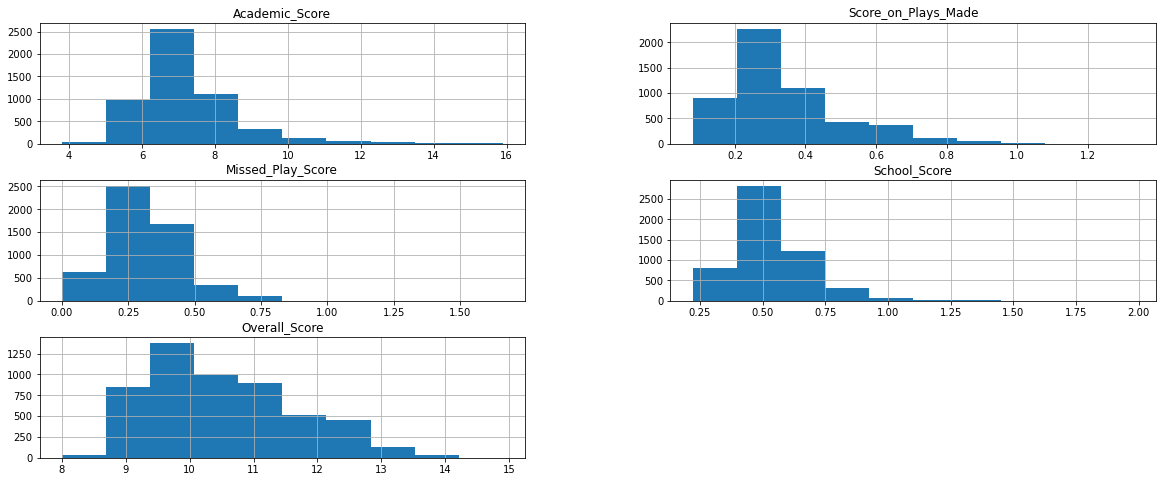

In [12]:
cont_vars_subset.hist(figsize=(20,8));

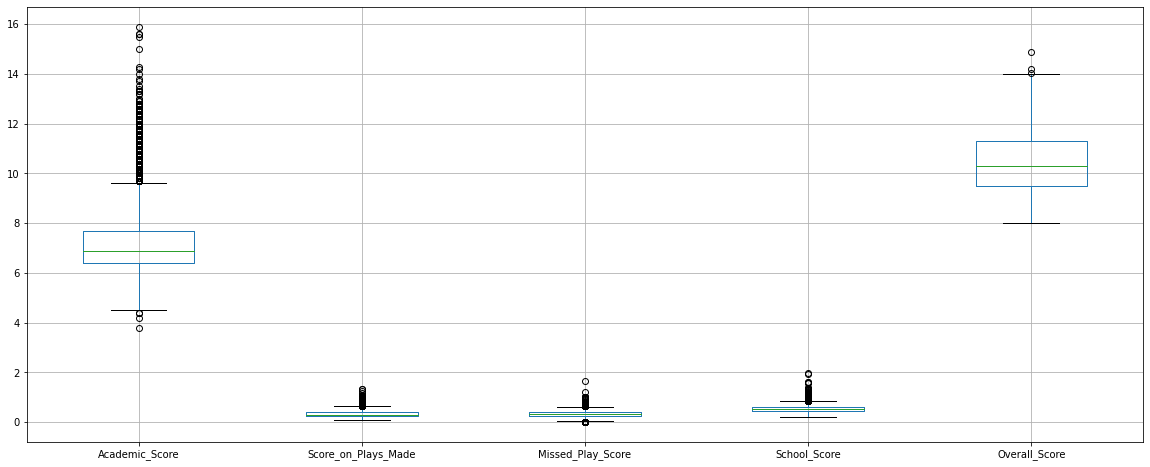

In [13]:
F_Scholarship.boxplot(figsize=(20,8));

In [14]:
F_Scholarship.skew()

Academic_Score         1.692632
Score_on_Plays_Made    1.442255
Missed_Play_Score      0.533434
School_Score           1.730203
Overall_Score          0.581415
dtype: float64

## Bivariate Analysis

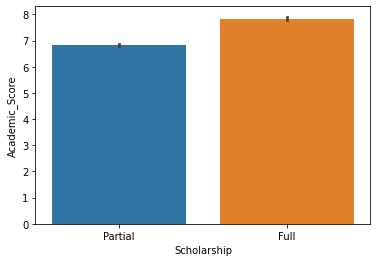

In [15]:
plt.figure()
ax = sns.barplot(x='Scholarship', y='Academic_Score', data=F_Scholarship)

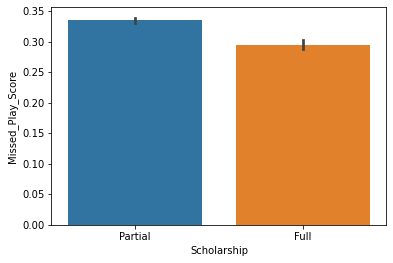

In [16]:
plt.figure()
ax = sns.barplot(x='Scholarship', y='Missed_Play_Score', data=F_Scholarship)

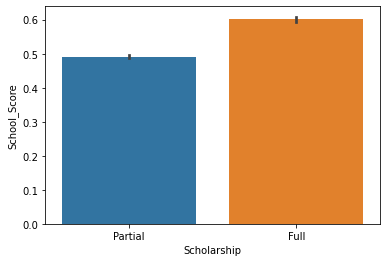

In [17]:
plt.figure()
ax = sns.barplot(x='Scholarship', y='School_Score', data=F_Scholarship)

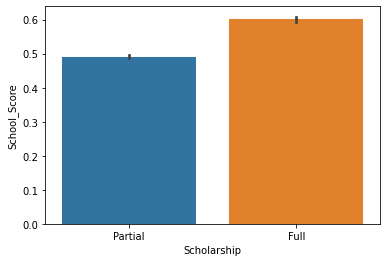

In [18]:
plt.figure()
ax = sns.barplot(x='Scholarship', y='School_Score', data=F_Scholarship)

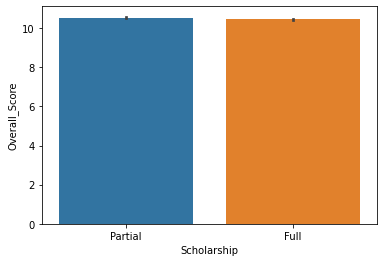

In [19]:
plt.figure()
ax = sns.barplot(x='Scholarship', y='Overall_Score', data=F_Scholarship)

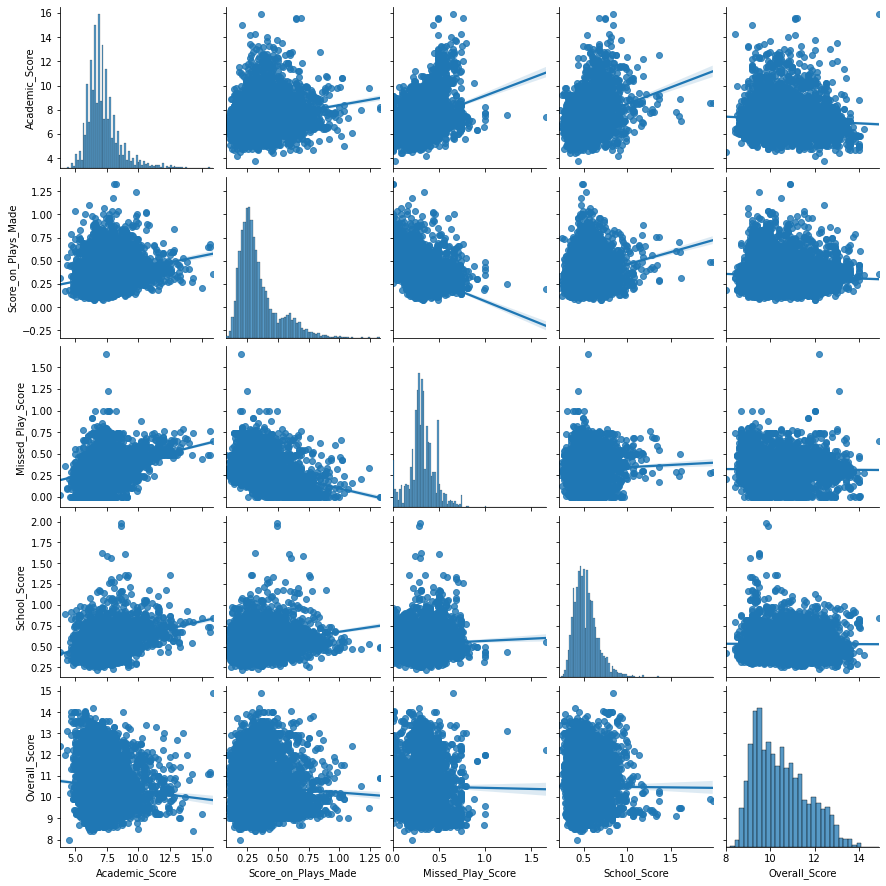

In [20]:
sns.pairplot(F_Scholarship,kind="reg")
plt.show()

In [21]:
F_Scholarship.corr()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score
Academic_Score,1.000000,0.221827,0.325630,0.309948,-0.082724
Score_on_Plays_Made,0.221827,1.000000,-0.365806,0.241303,-0.059938
Missed_Play_Score,0.325630,-0.365806,1.000000,0.053136,-0.012555
School_Score,0.309948,0.241303,0.053136,1.000000,-0.005954
Overall_Score,-0.082724,-0.059938,-0.012555,-0.005954,1.000000


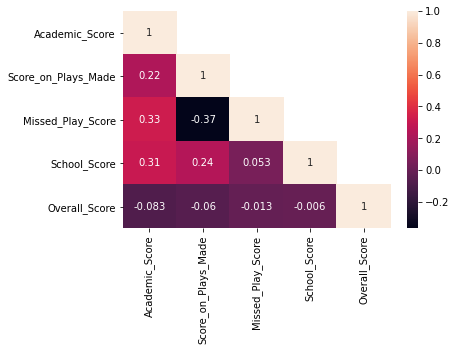

In [22]:
sns.heatmap(F_Scholarship.corr(), annot=True,mask=np.triu(F_Scholarship.corr(),+1));

In [23]:
##To remove Outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [24]:
for column in F_Scholarship.columns:
    if F_Scholarship[column].dtype != 'object': 
        lr,ur=remove_outlier(F_Scholarship[column])
        F_Scholarship[column]=np.where(F_Scholarship[column]>ur,ur,F_Scholarship[column])
        F_Scholarship[column]=np.where(F_Scholarship[column]<lr,lr,F_Scholarship[column])

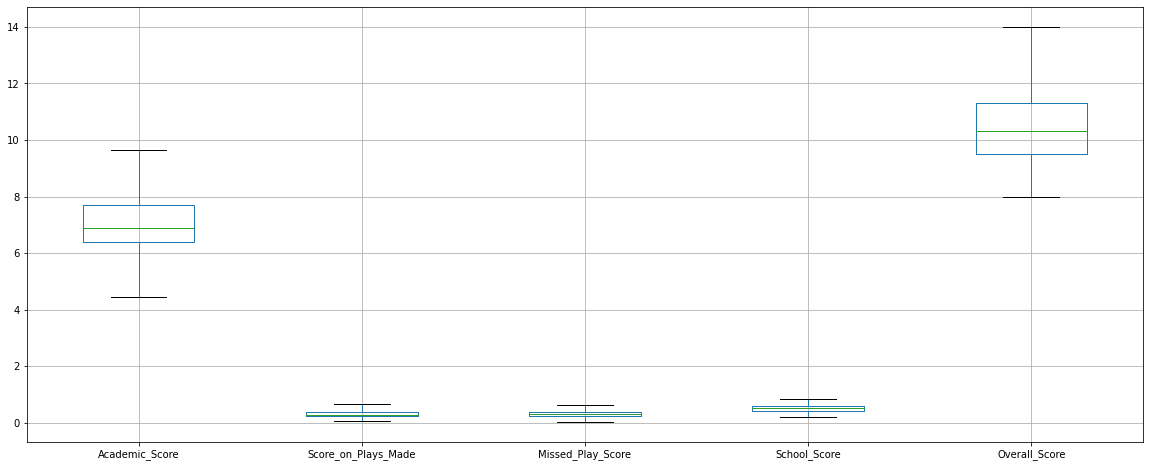

In [25]:
#After removal of Outliers
F_Scholarship.boxplot(figsize=(20,8));

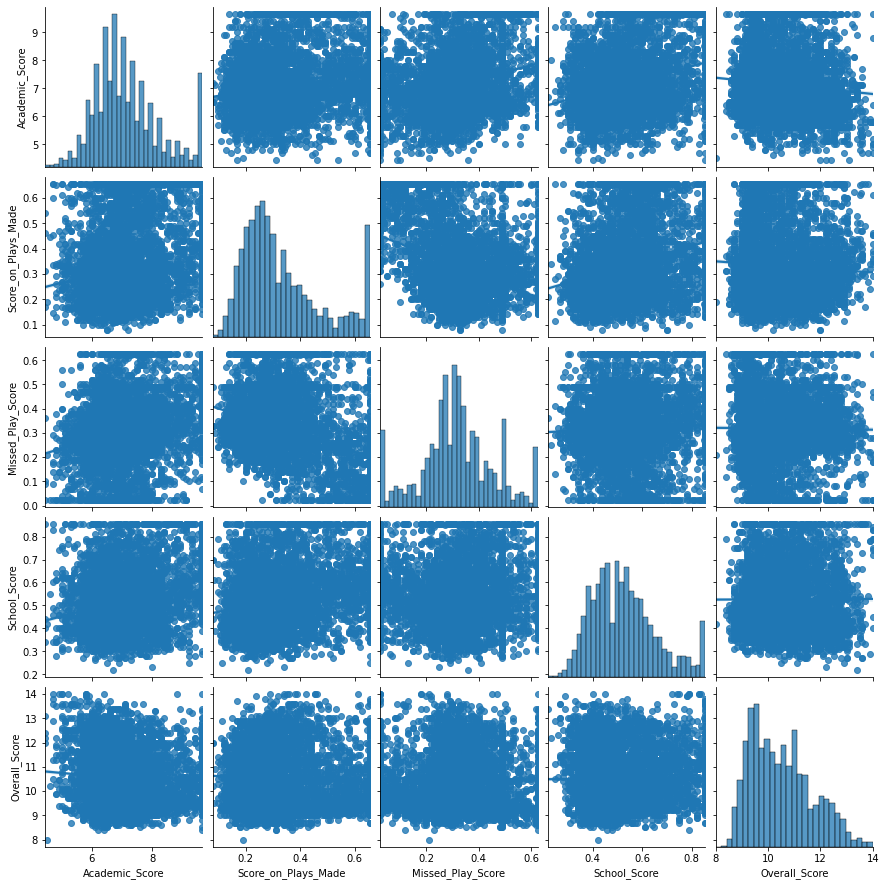

In [26]:
sns.pairplot(F_Scholarship,kind="reg")
plt.show()

In [27]:
#Variable "scholarship"conversion : Ranking imputation

In [28]:
F_Scholarship['Scholarship']=np.where(F_Scholarship['Scholarship'] =='Partial', 0, F_Scholarship['Scholarship'])

In [29]:
F_Scholarship['Scholarship']=np.where(F_Scholarship['Scholarship'] =='Full', 1, F_Scholarship['Scholarship'])
F_Scholarship['Scholarship'].head()

0    0
1    0
2    0
3    0
6    1
Name: Scholarship, dtype: object

In [30]:
#F_Scholarship['Scholarship']=np.where(F_Scholarship['Scholarship'] ==1, 0, F_Scholarship['Scholarship'])

In [31]:
F_Scholarship.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 6214
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Academic_Score       5268 non-null   float64
 1   Score_on_Plays_Made  5268 non-null   float64
 2   Missed_Play_Score    5268 non-null   float64
 3   Injury_Propensity    5268 non-null   object 
 4   School_Type          5268 non-null   object 
 5   School_Score         5268 non-null   float64
 6   Overall_Score        5268 non-null   float64
 7   Region               5268 non-null   object 
 8   Scholarship          5268 non-null   object 
dtypes: float64(5), object(4)
memory usage: 540.6+ KB


In [32]:
F_Scholarship['Scholarship']=F_Scholarship['Scholarship'].astype('int64')
F_Scholarship.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 6214
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Academic_Score       5268 non-null   float64
 1   Score_on_Plays_Made  5268 non-null   float64
 2   Missed_Play_Score    5268 non-null   float64
 3   Injury_Propensity    5268 non-null   object 
 4   School_Type          5268 non-null   object 
 5   School_Score         5268 non-null   float64
 6   Overall_Score        5268 non-null   float64
 7   Region               5268 non-null   object 
 8   Scholarship          5268 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 540.6+ KB


In [33]:
F_Scholarship['Scholarship'].value_counts()

0    3337
1    1931
Name: Scholarship, dtype: int64

In [34]:
print ('The percentage of Ones in the Target variable is',(F_Scholarship['Scholarship'].value_counts(1)[1])*100,
        'and the percentage of Zeros in the Target variable is',round((F_Scholarship['Scholarship'].value_counts(1)[0])*100,3))

The percentage of Ones in the Target variable is 36.655277145026574 and the percentage of Zeros in the Target variable is 63.345


Here 1 represents the Full Scholarship and 0 represents Partial Scholarship,Hence values of 0 is what we have to focus on

In [35]:
## Converting the other 'object' type variables as dummy variables

F_Scholarship_dummy = pd.get_dummies(F_Scholarship,drop_first=True)
F_Scholarship_dummy.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score,Scholarship,Injury_Propensity_Low,Injury_Propensity_Moderate,Injury_Propensity_Normal,School_Type_C,School_Type_D,Region_Southern,Region_Western
0,7.0,0.27,0.36,0.45,8.8,0,0,0,0,0,1,0,0
1,6.3,0.30,0.34,0.49,9.5,0,1,0,0,1,0,0,0
2,8.1,0.28,0.40,0.44,10.1,0,0,1,0,1,0,0,0
3,7.2,0.23,0.32,0.40,9.9,0,0,1,0,1,0,0,0
6,6.2,0.32,0.16,0.47,9.6,1,0,1,0,1,0,0,0


In [36]:
F_Scholarship_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 6214
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Academic_Score              5268 non-null   float64
 1   Score_on_Plays_Made         5268 non-null   float64
 2   Missed_Play_Score           5268 non-null   float64
 3   School_Score                5268 non-null   float64
 4   Overall_Score               5268 non-null   float64
 5   Scholarship                 5268 non-null   int64  
 6   Injury_Propensity_Low       5268 non-null   uint8  
 7   Injury_Propensity_Moderate  5268 non-null   uint8  
 8   Injury_Propensity_Normal    5268 non-null   uint8  
 9   School_Type_C               5268 non-null   uint8  
 10  School_Type_D               5268 non-null   uint8  
 11  Region_Southern             5268 non-null   uint8  
 12  Region_Western              5268 non-null   uint8  
dtypes: float64(5), int64(1), uint8(7)

## 2.Building various iterations of logistic regression Models

Build various iterations of the Logistic Regression model using appropriate variable selection techniques for the full data. Compare values of model selection criteria for proposed models. Compare as many criteria as you feel are suitable.
Use Full Data to develop a logistic regression model to identify significant predictors. Check whether the proposed model is free of multicollinearity. Apply variable selection method as required. Show all intermediate models leading to the final model. Justify your choice of the final model. Which are the significant predictors?

In [37]:
import statsmodels.formula.api as sm

In [38]:
F_Scholarship_dummy.columns

Index(['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'School_Score', 'Overall_Score', 'Scholarship', 'Injury_Propensity_Low',
       'Injury_Propensity_Moderate', 'Injury_Propensity_Normal',
       'School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western'],
      dtype='object')

## Model 1 : all the variables

In [39]:
formula_1='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity_Low+Injury_Propensity_Moderate+Injury_Propensity_Normal+School_Type_C+School_Type_D+Region_Southern+Region_Western'

In [40]:
Logistic_1 = sm.logit(formula=formula_1,data=F_Scholarship_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.444094
         Iterations 6


In [41]:
Logistic_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 5268
Model:                          Logit   Df Residuals:                     5255
Method:                           MLE   Df Model:                           12
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.3242
Time:                        21:45:56   Log-Likelihood:                -2339.5
converged:                       True   LL-Null:                       -3461.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -10.6622      0.556    -19.182      0.000     -11.752      -9.573
Academic_Score                 0.4261      0.044      9.722      0.000       0.340       0.512
Score_on_Plays_Made            5.1082      0.323     15.814      0.000       4.475       5.741
Missed_Play_Score             -1.4742      0.345     -4.270      0.000      -2.151      -0.797
School_Score                   2.8372      0.312      9.083      0.000       2.225       3.449
Overall_Score                  0.2025      0.045      4.538      0.000       0.115       0.290
Injury_Propensity_Low          1.6842      0.150     11.209      0.000       1.390       1.979
Injury_Propensity_Moderate     0.5718      0.157      3.652      0.000       0.265       0.879
Injury_Propensity_Normal       1.2277      0.154      7.956      0.000       0.925       1.530
School_Type_C                  1.3057      0.125     10.465      0.000       1.061       1.550
School_Type_D                  2.3572      0.211     11.166      0.000       1.943       2.771
Region_Southern               -0.4820      0.091     -5.277      0.000      -0.661      -0.303
Region_Western                 0.0163      0.092      0.177      0.859      -0.164       0.196
==============================================================================================
"""

In [42]:
##checking VIF values
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [43]:
vif_cal(input_data=F_Scholarship_dummy.drop('Scholarship',axis=1))

Academic_Score  VIF =  1.7
Score_on_Plays_Made  VIF =  1.61
Missed_Play_Score  VIF =  1.52
School_Score  VIF =  1.29
Overall_Score  VIF =  2.01
Injury_Propensity_Low  VIF =  3.54
Injury_Propensity_Moderate  VIF =  2.07
Injury_Propensity_Normal  VIF =  2.6
School_Type_C  VIF =  2.94
School_Type_D  VIF =  4.22
Region_Southern  VIF =  1.23
Region_Western  VIF =  1.26


In [44]:
# Variable Region_western seems to be of low significance, Hence, we decide to drop this and further the model.

## Model 2 : Dropping Western region

In [45]:
formula_2='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity_Low+Injury_Propensity_Moderate+Injury_Propensity_Normal+School_Type_C+School_Type_D+Region_Southern'

In [46]:
Logistic_2 = sm.logit(formula=formula_2,data=F_Scholarship_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.444097
         Iterations 6


In [47]:
Logistic_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 5268
Model:                          Logit   Df Residuals:                     5256
Method:                           MLE   Df Model:                           11
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.3242
Time:                        21:45:56   Log-Likelihood:                -2339.5
converged:                       True   LL-Null:                       -3461.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -10.6592      0.556    -19.184      0.000     -11.748      -9.570
Academic_Score                 0.4264      0.044      9.732      0.000       0.340       0.512
Score_on_Plays_Made            5.1181      0.318     16.086      0.000       4.494       5.742
Missed_Play_Score             -1.4756      0.345     -4.276      0.000      -2.152      -0.799
School_Score                   2.8368      0.312      9.081      0.000       2.225       3.449
Overall_Score                  0.2023      0.045      4.535      0.000       0.115       0.290
Injury_Propensity_Low          1.6863      0.150     11.260      0.000       1.393       1.980
Injury_Propensity_Moderate     0.5728      0.156      3.662      0.000       0.266       0.879
Injury_Propensity_Normal       1.2302      0.154      8.006      0.000       0.929       1.531
School_Type_C                  1.3039      0.124     10.485      0.000       1.060       1.548
School_Type_D                  2.3566      0.211     11.165      0.000       1.943       2.770
Region_Southern               -0.4876      0.086     -5.697      0.000      -0.655      -0.320
==============================================================================================
"""

In [48]:
vif_cal(input_data=F_Scholarship_dummy.drop(['Scholarship','Region_Western'],axis=1))

Academic_Score  VIF =  1.7
Score_on_Plays_Made  VIF =  1.56
Missed_Play_Score  VIF =  1.52
School_Score  VIF =  1.29
Overall_Score  VIF =  2.01
Injury_Propensity_Low  VIF =  3.53
Injury_Propensity_Moderate  VIF =  2.07
Injury_Propensity_Normal  VIF =  2.58
School_Type_C  VIF =  2.92
School_Type_D  VIF =  4.21
Region_Southern  VIF =  1.09


School type D is having the highest VIF. Let's remove it

## Model 3 : dropping School_Type_D

In [49]:
formula_3='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity_Low+Injury_Propensity_Moderate+Injury_Propensity_Normal+School_Type_C+Region_Southern'

In [50]:
Logistic_3 = sm.logit(formula=formula_3,data=F_Scholarship_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.456816
         Iterations 6


In [51]:
Logistic_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 5268
Model:                          Logit   Df Residuals:                     5257
Method:                           MLE   Df Model:                           10
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.3048
Time:                        21:45:57   Log-Likelihood:                -2406.5
converged:                       True   LL-Null:                       -3461.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -8.1936      0.491    -16.676      0.000      -9.157      -7.231
Academic_Score                 0.6135      0.040     15.375      0.000       0.535       0.692
Score_on_Plays_Made            5.9323      0.310     19.164      0.000       5.326       6.539
Missed_Play_Score             -1.2710      0.339     -3.752      0.000      -1.935      -0.607
School_Score                   3.8688      0.295     13.095      0.000       3.290       4.448
Overall_Score                 -0.0895      0.036     -2.510      0.012      -0.159      -0.020
Injury_Propensity_Low          0.7881      0.116      6.785      0.000       0.560       1.016
Injury_Propensity_Moderate    -0.0022      0.138     -0.016      0.987      -0.273       0.269
Injury_Propensity_Normal       0.5225      0.130      4.024      0.000       0.268       0.777
School_Type_C                  0.2849      0.081      3.522      0.000       0.126       0.443
Region_Southern               -0.4929      0.084     -5.839      0.000      -0.658      -0.327
==============================================================================================
"""

In [52]:
vif_cal(input_data=F_Scholarship_dummy.drop(['Scholarship','Region_Western','School_Type_D'],axis=1))

Academic_Score  VIF =  1.4
Score_on_Plays_Made  VIF =  1.47
Missed_Play_Score  VIF =  1.52
School_Score  VIF =  1.19
Overall_Score  VIF =  1.35
Injury_Propensity_Low  VIF =  2.48
Injury_Propensity_Moderate  VIF =  1.88
Injury_Propensity_Normal  VIF =  2.18
School_Type_C  VIF =  1.23
Region_Southern  VIF =  1.09


p value of Injury_Propensity_Moderate is higher but its vif is lower. Because of the higher p value we remove it

## Model 4  : Dropping Injury_Propensity_Moderate

In [53]:
formula_4='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity_Low+Injury_Propensity_Normal+School_Type_C+Region_Southern'

In [54]:
Logistic_4 = sm.logit(formula=formula_4,data=F_Scholarship_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.456816
         Iterations 6


In [55]:
Logistic_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 5268
Model:                          Logit   Df Residuals:                     5258
Method:                           MLE   Df Model:                            9
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.3048
Time:                        21:45:57   Log-Likelihood:                -2406.5
converged:                       True   LL-Null:                       -3461.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.1933      0.491    -16.691      0.000      -9.155      -7.231
Academic_Score               0.6135      0.040     15.375      0.000       0.535       0.692
Score_on_Plays_Made          5.9322      0.310     19.164      0.000       5.326       6.539
Missed_Play_Score           -1.2709      0.339     -3.752      0.000      -1.935      -0.607
School_Score                 3.8690      0.295     13.107      0.000       3.290       4.448
Overall_Score               -0.0896      0.035     -2.586      0.010      -0.157      -0.022
Injury_Propensity_Low        0.7893      0.090      8.791      0.000       0.613       0.965
Injury_Propensity_Normal     0.5237      0.106      4.934      0.000       0.316       0.732
School_Type_C                0.2846      0.078      3.666      0.000       0.132       0.437
Region_Southern             -0.4929      0.084     -5.840      0.000      -0.658      -0.327
============================================================================================
"""

In [56]:
vif_cal(input_data=F_Scholarship_dummy.drop(['Scholarship','Region_Western','School_Type_D','Injury_Propensity_Moderate'],axis=1))

Academic_Score  VIF =  1.4
Score_on_Plays_Made  VIF =  1.47
Missed_Play_Score  VIF =  1.52
School_Score  VIF =  1.19
Overall_Score  VIF =  1.27
Injury_Propensity_Low  VIF =  1.56
Injury_Propensity_Normal  VIF =  1.53
School_Type_C  VIF =  1.13
Region_Southern  VIF =  1.09


all the variables are significant and their vif is less than 2

In [57]:
## All the other Variables seem to significant.

## 3.TRAIN AND TEST DATA - BUILDING MODEL

Alternatively, if prediction accuracy of the full scholarship is the only objective, then you may want to divide the data into a training and a test set, chosen randomly, and use the training set to develop a model and test set to validate your model. Use the models developed in Part (2) to compare accuracy in training and test sets. Compare the final model of Part (2) and the proposed one in Part (3). Which model provides the most accurate prediction? If the model found in Part (2) is different from the proposed model in Part (3), give an explanation.

## Splitting the data

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
Train,Test = train_test_split(F_Scholarship_dummy,test_size=0.3,random_state=1,stratify=F_Scholarship_dummy['Scholarship'])

In [60]:
Train.shape

(3687, 13)

In [61]:
Test.shape

(1581, 13)

In [62]:
Train['Scholarship'].value_counts(1)

0    0.633577
1    0.366423
Name: Scholarship, dtype: float64

In [63]:
Test['Scholarship'].value_counts(1)

0    0.633144
1    0.366856
Name: Scholarship, dtype: float64


## Model Accuracy on train and test data based on model in part 2

In [64]:
#Model 1

In [65]:
Log_1 = sm.logit(formula=formula_1,data=Train).fit()

Optimization terminated successfully.
         Current function value: 0.441791
         Iterations 6


In [66]:
Dup_train=Train.copy()
Dup_test=Test.copy()

In [67]:
Log_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 3687
Model:                          Logit   Df Residuals:                     3674
Method:                           MLE   Df Model:                           12
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.3276
Time:                        21:45:59   Log-Likelihood:                -1628.9
converged:                       True   LL-Null:                       -2422.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -10.7448      0.671    -16.012      0.000     -12.060      -9.430
Academic_Score                 0.4198      0.053      7.959      0.000       0.316       0.523
Score_on_Plays_Made            5.1832      0.393     13.187      0.000       4.413       5.954
Missed_Play_Score             -1.3763      0.418     -3.291      0.001      -2.196      -0.557
School_Score                   2.9418      0.378      7.791      0.000       2.202       3.682
Overall_Score                  0.1997      0.054      3.713      0.000       0.094       0.305
Injury_Propensity_Low          1.6527      0.177      9.345      0.000       1.306       1.999
Injury_Propensity_Moderate     0.5519      0.184      2.995      0.003       0.191       0.913
Injury_Propensity_Normal       1.2208      0.182      6.697      0.000       0.864       1.578
School_Type_C                  1.3658      0.151      9.041      0.000       1.070       1.662
School_Type_D                  2.3083      0.251      9.211      0.000       1.817       2.799
Region_Southern               -0.4037      0.109     -3.694      0.000      -0.618      -0.190
Region_Western                 0.0162      0.111      0.147      0.883      -0.201       0.233
==============================================================================================
"""

In [68]:
X_train=Dup_train.drop('Scholarship',axis=1)
Y_train=Dup_train['Scholarship']

In [71]:
ylogpred_prob_train = Log_1.predict(X_train)
ylogpred_train  = (ylogpred_prob_train > 0.5).astype(int)
ylogpred_train

3005    0
1205    0
811     0
2666    1
772     0
       ..
5880    1
4230    0
3710    0
4910    1
4124    0
Length: 3687, dtype: int32

In [72]:
#Build the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

In [73]:
confusion_matrix(Y_train,ylogpred_train)

array([[2200,  136],
       [ 451,  900]], dtype=int64)

In [74]:
print(classification_report(Y_train,ylogpred_train))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2336
           1       0.87      0.67      0.75      1351

    accuracy                           0.84      3687
   macro avg       0.85      0.80      0.82      3687
weighted avg       0.84      0.84      0.84      3687



In [75]:
X_test=Dup_test.drop('Scholarship',axis=1)
Y_test=Dup_test['Scholarship']

In [76]:
ylogpred_prob_test = Log_1.predict(X_test)
ylogpred_test  = (ylogpred_prob_test > 0.5).astype(int)
ylogpred_test

5166    1
3168    0
267     0
1596    0
1187    0
       ..
3836    0
3728    0
4511    0
4999    1
3601    0
Length: 1581, dtype: int32

In [77]:
confusion_matrix(Y_test,ylogpred_test)

array([[942,  59],
       [197, 383]], dtype=int64)

In [78]:
print(classification_report(Y_test,ylogpred_test))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1001
           1       0.87      0.66      0.75       580

    accuracy                           0.84      1581
   macro avg       0.85      0.80      0.81      1581
weighted avg       0.84      0.84      0.83      1581



In [79]:
#Model 2

In [80]:
Log_2 = sm.logit(formula=formula_2,data=Train).fit()

Optimization terminated successfully.
         Current function value: 0.441794
         Iterations 6


In [81]:
Log_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 3687
Model:                          Logit   Df Residuals:                     3675
Method:                           MLE   Df Model:                           11
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.3276
Time:                        21:47:36   Log-Likelihood:                -1628.9
converged:                       True   LL-Null:                       -2422.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -10.7414      0.671    -16.015      0.000     -12.056      -9.427
Academic_Score                 0.4199      0.053      7.963      0.000       0.317       0.523
Score_on_Plays_Made            5.1930      0.387     13.406      0.000       4.434       5.952
Missed_Play_Score             -1.3776      0.418     -3.295      0.001      -2.197      -0.558
School_Score                   2.9414      0.378      7.790      0.000       2.201       3.681
Overall_Score                  0.1995      0.054      3.711      0.000       0.094       0.305
Injury_Propensity_Low          1.6551      0.176      9.396      0.000       1.310       2.000
Injury_Propensity_Moderate     0.5530      0.184      3.004      0.003       0.192       0.914
Injury_Propensity_Normal       1.2233      0.181      6.741      0.000       0.868       1.579
School_Type_C                  1.3639      0.151      9.061      0.000       1.069       1.659
School_Type_D                  2.3077      0.251      9.210      0.000       1.817       2.799
Region_Southern               -0.4092      0.103     -3.988      0.000      -0.610      -0.208
==============================================================================================
"""

In [83]:
ylogpred_prob_train = Log_2.predict(X_train)
ylogpred_train  = (ylogpred_prob_train > 0.5).astype(int)
ylogpred_train

3005    0
1205    0
811     0
2666    1
772     0
       ..
5880    1
4230    0
3710    0
4910    1
4124    0
Length: 3687, dtype: int32

In [84]:
confusion_matrix(Y_train,ylogpred_train)

array([[2198,  138],
       [ 451,  900]], dtype=int64)

In [85]:
print(classification_report(Y_train,ylogpred_train))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2336
           1       0.87      0.67      0.75      1351

    accuracy                           0.84      3687
   macro avg       0.85      0.80      0.82      3687
weighted avg       0.84      0.84      0.83      3687



In [86]:
ylogpred_prob_test = Log_2.predict(X_test)
ylogpred_test  = (ylogpred_prob_test > 0.5).astype(int)
ylogpred_test

5166    1
3168    0
267     0
1596    0
1187    0
       ..
3836    0
3728    0
4511    0
4999    1
3601    0
Length: 1581, dtype: int32

In [87]:
confusion_matrix(Y_test,ylogpred_test)

array([[942,  59],
       [197, 383]], dtype=int64)

In [88]:
print(classification_report(Y_test,ylogpred_test))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1001
           1       0.87      0.66      0.75       580

    accuracy                           0.84      1581
   macro avg       0.85      0.80      0.81      1581
weighted avg       0.84      0.84      0.83      1581



In [89]:
#Model 3

In [90]:
Log_3 = sm.logit(formula=formula_3,data=Train).fit()

Optimization terminated successfully.
         Current function value: 0.454103
         Iterations 6


In [91]:
Log_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 3687
Model:                          Logit   Df Residuals:                     3676
Method:                           MLE   Df Model:                           10
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.3088
Time:                        21:48:09   Log-Likelihood:                -1674.3
converged:                       True   LL-Null:                       -2422.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -8.2989      0.594    -13.979      0.000      -9.462      -7.135
Academic_Score                 0.6039      0.048     12.586      0.000       0.510       0.698
Score_on_Plays_Made            6.0441      0.376     16.073      0.000       5.307       6.781
Missed_Play_Score             -1.1712      0.409     -2.863      0.004      -1.973      -0.369
School_Score                   3.9855      0.357     11.170      0.000       3.286       4.685
Overall_Score                 -0.0929      0.043     -2.170      0.030      -0.177      -0.009
Injury_Propensity_Low          0.8028      0.139      5.769      0.000       0.530       1.076
Injury_Propensity_Moderate     0.0232      0.165      0.140      0.889      -0.301       0.347
Injury_Propensity_Normal       0.5442      0.155      3.504      0.000       0.240       0.849
School_Type_C                  0.3405      0.097      3.516      0.000       0.151       0.530
Region_Southern               -0.4182      0.101     -4.140      0.000      -0.616      -0.220
==============================================================================================
"""

In [94]:
ylogpred_prob_train = Log_3.predict(X_train)
ylogpred_train  = (ylogpred_prob_train > 0.5).astype(int)
ylogpred_train

3005    0
1205    0
811     0
2666    1
772     0
       ..
5880    1
4230    0
3710    0
4910    1
4124    0
Length: 3687, dtype: int32

In [95]:
confusion_matrix(Y_train,ylogpred_train)

array([[2183,  153],
       [ 470,  881]], dtype=int64)

In [96]:
print(classification_report(Y_train,ylogpred_train))

              precision    recall  f1-score   support

           0       0.82      0.93      0.88      2336
           1       0.85      0.65      0.74      1351

    accuracy                           0.83      3687
   macro avg       0.84      0.79      0.81      3687
weighted avg       0.83      0.83      0.83      3687



In [97]:
ylogpred_prob_test = Log_3.predict(X_test)
ylogpred_test  = (ylogpred_prob_test > 0.5).astype(int)
ylogpred_test

5166    1
3168    0
267     0
1596    0
1187    0
       ..
3836    0
3728    0
4511    0
4999    1
3601    0
Length: 1581, dtype: int32

In [98]:
confusion_matrix(Y_test,ylogpred_test)

array([[936,  65],
       [206, 374]], dtype=int64)

In [99]:
print(classification_report(Y_test,ylogpred_test))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1001
           1       0.85      0.64      0.73       580

    accuracy                           0.83      1581
   macro avg       0.84      0.79      0.80      1581
weighted avg       0.83      0.83      0.82      1581



In [100]:
#Model 4

In [101]:
Log_4 = sm.logit(formula=formula_4,data=Train).fit()

Optimization terminated successfully.
         Current function value: 0.454106
         Iterations 6


In [102]:
Log_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 3687
Model:                          Logit   Df Residuals:                     3677
Method:                           MLE   Df Model:                            9
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.3088
Time:                        21:48:25   Log-Likelihood:                -1674.3
converged:                       True   LL-Null:                       -2422.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.3018      0.593    -13.993      0.000      -9.465      -7.139
Academic_Score               0.6040      0.048     12.590      0.000       0.510       0.698
Score_on_Plays_Made          6.0432      0.376     16.074      0.000       5.306       6.780
Missed_Play_Score           -1.1729      0.409     -2.869      0.004      -1.974      -0.372
School_Score                 3.9834      0.356     11.176      0.000       3.285       4.682
Overall_Score               -0.0916      0.042     -2.194      0.028      -0.173      -0.010
Injury_Propensity_Low        0.7907      0.109      7.284      0.000       0.578       1.003
Injury_Propensity_Normal     0.5319      0.128      4.157      0.000       0.281       0.783
School_Type_C                0.3444      0.093      3.713      0.000       0.163       0.526
Region_Southern             -0.4185      0.101     -4.144      0.000      -0.616      -0.221
============================================================================================
"""

In [104]:
ylogpred_prob_train = Log_4.predict(X_train)
ylogpred_train  = (ylogpred_prob_train > 0.5).astype(int)
ylogpred_train

3005    0
1205    0
811     0
2666    1
772     0
       ..
5880    1
4230    0
3710    0
4910    1
4124    0
Length: 3687, dtype: int32

In [105]:
confusion_matrix(Y_train,ylogpred_train)

array([[2184,  152],
       [ 470,  881]], dtype=int64)

In [106]:
print(classification_report(Y_train,ylogpred_train))

              precision    recall  f1-score   support

           0       0.82      0.93      0.88      2336
           1       0.85      0.65      0.74      1351

    accuracy                           0.83      3687
   macro avg       0.84      0.79      0.81      3687
weighted avg       0.83      0.83      0.83      3687



In [107]:
ylogpred_prob_test = Log_4.predict(X_test)
ylogpred_test  = (ylogpred_prob_test > 0.5).astype(int)
ylogpred_test

5166    1
3168    0
267     0
1596    0
1187    0
       ..
3836    0
3728    0
4511    0
4999    1
3601    0
Length: 1581, dtype: int32

In [108]:
confusion_matrix(Y_test,ylogpred_test)

array([[935,  66],
       [206, 374]], dtype=int64)

In [109]:
print(classification_report(Y_test,ylogpred_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1001
           1       0.85      0.64      0.73       580

    accuracy                           0.83      1581
   macro avg       0.83      0.79      0.80      1581
weighted avg       0.83      0.83      0.82      1581



## Building models on training data and testing it on test dataset

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
LR = LogisticRegression(solver='newton-cg',penalty='none')

## Model 1 : Including all the predictors

In [112]:
model_1 = LR.fit(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western']],Train['Scholarship'])

In [113]:
M1_acc = model_1.score(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western']],Train['Scholarship'])
print('Accuracy Score of Model 1:',M1_acc)

Accuracy Score of Model 1: 0.8407919717927854


In [114]:
M1_acc_test = model_1.score(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western']],Test['Scholarship'])
print('Accuracy Score of Model 1:',M1_acc_test)

Accuracy Score of Model 1: 0.8380771663504112


In [115]:
## predicting the classes and probabilities on test data
model_1_test_class = model_1.predict(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western']])
model_1_test_probabilities = model_1.predict_proba(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western']])

## Model 2 : Dropping Region_Western

In [116]:
model_2 = LR.fit(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'School_Type_D', 'Region_Southern']],Train['Scholarship'])

In [117]:
M2_acc = model_2.score(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'School_Type_D', 'Region_Southern']],Train['Scholarship'])
print('Accuracy Score of Model 2:',M2_acc)

Accuracy Score of Model 2: 0.8402495253593708


In [118]:
M2_acc_test = model_2.score(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'School_Type_D', 'Region_Southern']],Test['Scholarship'])
print('Accuracy Score of Model 2:',M2_acc_test)

Accuracy Score of Model 2: 0.8380771663504112


In [119]:
## predicting the classes and probabilities on test data
model_2_test_class = model_2.predict(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'School_Type_D', 'Region_Southern']])
model_2_test_probabilities = model_2.predict_proba(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'School_Type_D', 'Region_Southern']])

## Model 3 : Dropping School Type D

In [120]:
model_3 = LR.fit(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'Region_Southern']],Train['Scholarship'])

In [121]:
M3_acc = model_3.score(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'Region_Southern']],Train['Scholarship'])
print('Accuracy Score of Model 3:',M3_acc)

Accuracy Score of Model 3: 0.8310279359913209


In [122]:
M3_acc_test = model_3.score(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'Region_Southern']],Test['Scholarship'])
print('Accuracy Score of Model 3:',M3_acc_test)

Accuracy Score of Model 3: 0.8285895003162556


In [123]:
## predicting the classes and probabilities on test data
model_3_test_class = model_3.predict(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'Region_Southern']])
model_3_test_probabilities = model_3.predict_proba(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C','Region_Southern']])

## Model 4 Dropping Injury_Propensity_Moderate

In [124]:
model_4 = LR.fit(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Normal','School_Type_C', 'Region_Southern']],Train['Scholarship'])

In [125]:
M4_acc= model_4.score(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Normal','School_Type_C', 'Region_Southern']],Train['Scholarship'])
print('Accuracy Score of Model 4:',M4_acc)

Accuracy Score of Model 4: 0.8312991592080282


In [126]:
M4_acc_test= model_4.score(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Normal','School_Type_C', 'Region_Southern']],Test['Scholarship'])
print('Accuracy Score of Model 4:',M4_acc_test)

Accuracy Score of Model 4: 0.8279569892473119


In [127]:
## predicting the classes and probabilities on test data
model_4_test_class = model_4.predict(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Normal','School_Type_C', 'Region_Southern']])
model_4_test_probabilities = model_4.predict_proba(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Normal','School_Type_C','Region_Southern']])

## Final train 

In [128]:
final_train= Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low', 'Injury_Propensity_Normal','School_Type_C', 'Region_Southern']]

In [129]:
df=pd.DataFrame({'odds_ratio':(np.exp(model_4.coef_).T).tolist(),'Probability':(np.exp(model_4.coef_)/(1+np.exp(model_4.coef_))).T.tolist()  ,'variable':final_train.columns.tolist()})
df['odds_ratio'] = df['odds_ratio'].str.get(0)

df=df.sort_values('odds_ratio', ascending=False)
df

,odds_ratio,Probability,variable
1,421.232534,[0.9976316367900837],Score_on_Plays_Made
3,53.697919,[0.9817177689674477],School_Score
5,2.204843,[0.687972281340518],Injury_Propensity_Low
0,1.829458,[0.6465754447847907],Academic_Score
6,1.702118,[0.6299199309505525],Injury_Propensity_Normal
7,1.411087,[0.5852493619214754],School_Type_C
4,0.912495,[0.47712271439367976],Overall_Score
8,0.658034,[0.3968760430338041],Region_Southern
2,0.309469,[0.23633176910311895],Missed_Play_Score


In [130]:
params = Logistic_4.params
conf = Logistic_4.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                                  5%         95%  Odds Ratio
Intercept                   0.000106    0.000724    0.000276
Academic_Score              1.707955    1.997143    1.846898
Score_on_Plays_Made       205.518658  691.557268  376.998570
Missed_Play_Score           0.144468    0.544974    0.280591
School_Score               26.853352   85.415652   47.892552
Overall_Score               0.854279    0.978536    0.914299
Injury_Propensity_Low       1.846499    2.625341    2.201747
Injury_Propensity_Normal    1.371136    2.078543    1.688184
School_Type_C               1.141585    1.547621    1.329188
Region_Southern             0.517721    0.720747    0.610857


## Confusion Matrix

In [131]:
from sklearn import metrics

In [132]:
## For test data
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

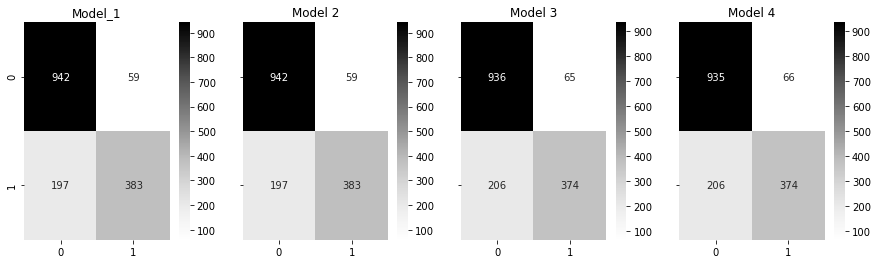

In [133]:
f,a =  plt.subplots(1,4,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_1_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Model_1')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_2_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Model 2');

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_3_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][2]);
a[0][2].set_title('Model 3');

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_4_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][3]);
a[0][3].set_title('Model 4');

In [134]:
print('Model 1')
print(metrics.classification_report(Test['Scholarship'],model_1_test_class),'\n')

print('Model 2')
print(metrics.classification_report(Test['Scholarship'],model_2_test_class),'\n')

print('Model 3')
print(metrics.classification_report(Test['Scholarship'],model_3_test_class),'\n')

print('Model 4')
print(metrics.classification_report(Test['Scholarship'],model_4_test_class))

Model 1
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1001
           1       0.87      0.66      0.75       580

    accuracy                           0.84      1581
   macro avg       0.85      0.80      0.81      1581
weighted avg       0.84      0.84      0.83      1581
 

Model 2
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1001
           1       0.87      0.66      0.75       580

    accuracy                           0.84      1581
   macro avg       0.85      0.80      0.81      1581
weighted avg       0.84      0.84      0.83      1581
 

Model 3
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1001
           1       0.85      0.64      0.73       580

    accuracy                           0.83      1581
   macro avg       0.84      0.79      0.80      1581
weighted avg       0.83      0.83      0.82   

In [135]:
#Extraction Metrics : Model 1 test
M1_test=metrics.classification_report(Test['Scholarship'],model_1_test_class,output_dict=True)
M1test=pd.DataFrame(M1_test).transpose()
M1test_precision=round(M1test.loc["1"][0],2)
M1test_recall=round(M1test.loc["1"][1],2)
M1test_f1=round(M1test.loc["1"][2],2)
print ('M1test_precision ',M1test_precision)
print ('M1test_recall ',M1test_recall)
print ('M1test_f1 ',M1test_f1)


#Extraction Metrics : Model 2 test
M2_test=metrics.classification_report(Test['Scholarship'],model_2_test_class,output_dict=True)
M2test=pd.DataFrame(M2_test).transpose()
M2test_precision=round(M2test.loc["1"][0],2)
M2test_recall=round(M2test.loc["1"][1],2)
M2test_f1=round(M2test.loc["1"][2],2)
print ('M2test_precision ',M2test_precision)
print ('M2test_recall ',M2test_recall)
print ('M2test_f1 ',M2test_f1)

#Extraction Metrics : Model 3 test
M3_test=metrics.classification_report(Test['Scholarship'],model_3_test_class,output_dict=True)
M3test=pd.DataFrame(M3_test).transpose()
M3test_precision=round(M3test.loc["1"][0],2)
M3test_recall=round(M3test.loc["1"][1],2)
M3test_f1=round(M3test.loc["1"][2],2)
print ('M3test_precision ',M3test_precision)
print ('M3test_recall ',M3test_recall)
print ('M3test_f1 ',M3test_f1)


#Extraction Metrics : Model 4 test
M4_test=metrics.classification_report(Test['Scholarship'],model_4_test_class,output_dict=True)
M4test=pd.DataFrame(M4_test).transpose()
M4test_precision=round(M4test.loc["1"][0],2)
M4test_recall=round(M4test.loc["1"][1],2)
M4test_f1=round(M4test.loc["1"][2],2)
print ('M4test_precision ',M4test_precision)
print ('M4test_recall ',M4test_recall)
print ('M4test_f1 ',M4test_f1)


M1test_precision  0.87
M1test_recall  0.66
M1test_f1  0.75
M2test_precision  0.87
M2test_recall  0.66
M2test_f1  0.75
M3test_precision  0.85
M3test_recall  0.64
M3test_f1  0.73
M4test_precision  0.85
M4test_recall  0.64
M4test_f1  0.73


In [136]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

Model 1 AUC: 0.81300


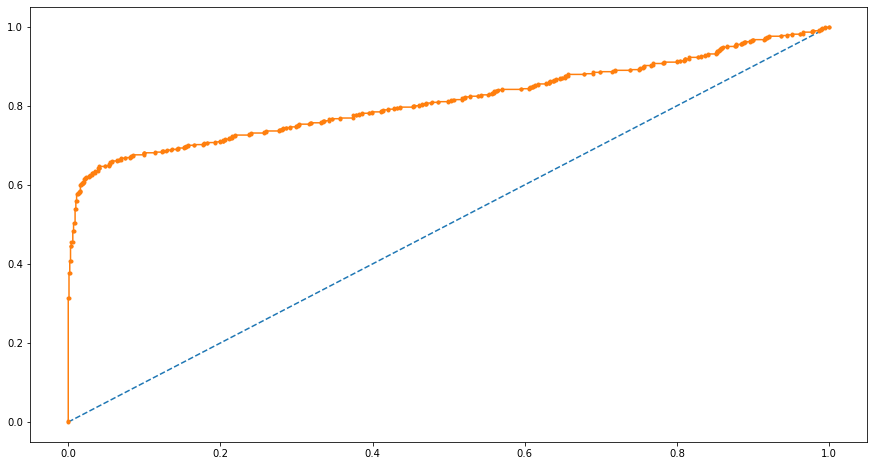

Model 2 AUC: 0.81303


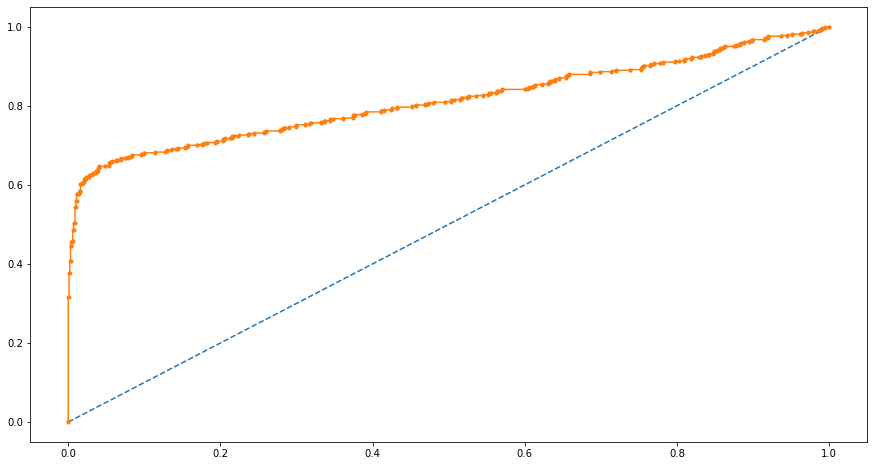

Model 3 AUC: 0.80520


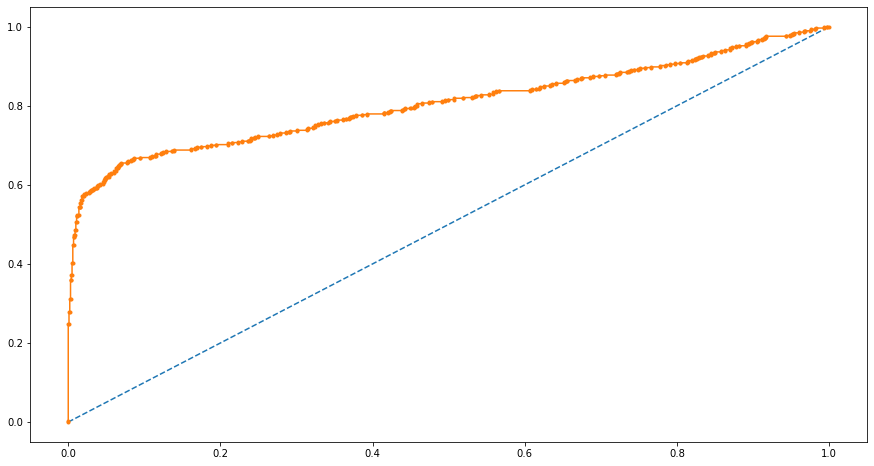

Model 4 AUC: 0.80524


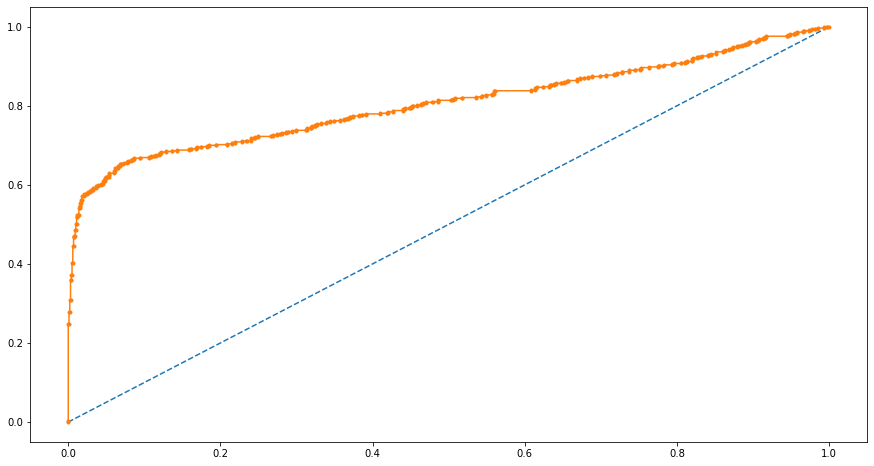

In [137]:
# AUC and ROC for the model 1


# 
# calculate AUC
M1_auc = metrics.roc_auc_score(Test['Scholarship'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % M1_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
M1_fpr, M1_tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(M1_fpr, M1_tpr, marker='.')
# show the plot
plt.show()


# AUC and ROC for the model 2


# 
# calculate AUC
M2_auc = metrics.roc_auc_score(Test['Scholarship'],model_2_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 2 AUC: %.5f' % M2_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
M2_fpr, M2_tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_2_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(M2_fpr, M2_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the model 3


# calculating on the basis of a person not defaulting
# calculate AUC
M3_auc = metrics.roc_auc_score(Test['Scholarship'],model_3_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 3 AUC: %.5f' % M3_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
M3_fpr, M3_tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_3_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(M3_fpr, M3_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the model 4


# calculating on the basis of a person not defaulting
# calculate AUC
M4_auc = metrics.roc_auc_score(Test['Scholarship'],model_4_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 4 AUC: %.5f' % M4_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
M4_fpr, M4_tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_4_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(M4_fpr, M4_tpr, marker='.')
# show the plot
plt.show()

### Model Comparison : Metrics , ROC, AUC

In [138]:
#Metrics Comparison
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
Summary = pd.DataFrame({'Model LOG 1':[M1_acc,M1_auc,M1test_recall,M1test_precision,M1test_f1],
        'Model LOG 2':[M2_acc,M2_auc,M2test_recall,M2test_precision,M2test_f1],
       'Model LOG 3':[M3_acc,M3_auc,M3test_recall,M3test_precision,M3test_f1],
        'Model LOG 4':[M4_acc,M4_auc,M4test_recall,M4test_precision,M4test_f1]},index=index)
round(Summary,2)

,Model LOG 1,Model LOG 2,Model LOG 3,Model LOG 4
Accuracy,0.84,0.84,0.83,0.83
AUC,0.81,0.81,0.81,0.81
Recall,0.66,0.66,0.64,0.64
Precision,0.87,0.87,0.85,0.85
F1 Score,0.75,0.75,0.73,0.73


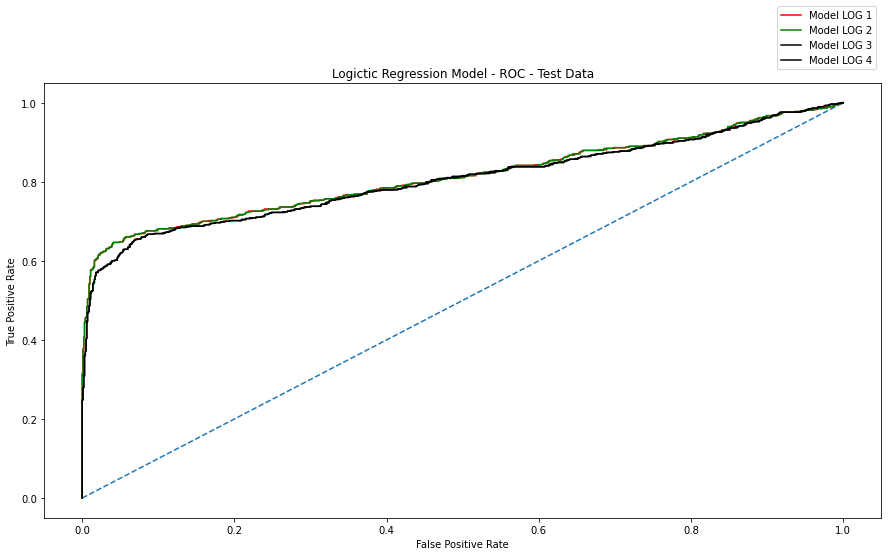

In [139]:
#ROC  and AUC
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(M1_fpr, M1_tpr,color='red',label="Model LOG 1")
plt.plot(M2_fpr,M2_tpr,color='green',label="Model LOG 2")
plt.plot(M3_fpr,M3_tpr,color='black',label="Model LOG 3")
plt.plot(M4_fpr,M4_tpr,color='black',label="Model LOG 4")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logictic Regression Model - ROC - Test Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# 4.LINEAR DISCRIMINANT ANALYSIS

Use the same training-test data split in Part (3) to develop a suitable linear discriminant model. Use the same to predict discriminant scores for the test data. Compare the final output from the logistic regression model and LDA

## Building LDA model using Train-Test split data

In [140]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [141]:
LDA = LinearDiscriminantAnalysis()

## Building LDA model on training data and testing the accuracy-Model 1

In [142]:
model_1_LDA = LDA.fit(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western']],Train['Scholarship'])

In [143]:
M1_acc=model_1_LDA.score(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western']],Train['Scholarship'])
print('Accuracy Score of LDA Model 1:',M1_acc)

Accuracy Score of LDA Model 1: 0.842690534309737


## Predicting classes and probabilities on the test data-Model 1

In [144]:
model_1_LDA_test_class = model_1_LDA.predict(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western']])
model_1_LDA_test_probabilities = model_1_LDA.predict_proba(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western']])

## Building LDA model on training data and testing the accuracy-Model 2

In [145]:
model_2_LDA = LDA.fit(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'School_Type_D', 'Region_Southern']],Train['Scholarship'])

In [146]:
M2_acc= model_2_LDA.score(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'School_Type_D', 'Region_Southern']],Train['Scholarship'])
print('Accuracy Score of LDA Model 2:',M2_acc)

Accuracy Score of LDA Model 2: 0.8424193110930296


## Predicting classes and probabilities on the test data- Model 2

In [147]:
model_2_LDA_test_class = model_2_LDA.predict(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'School_Type_D', 'Region_Southern']])
model_2_LDA_test_probabilities = model_2_LDA.predict_proba(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'School_Type_D', 'Region_Southern']])

## Building LDA model on training data and testing the accuracy-Model 3

In [148]:
model_3_LDA = LDA.fit(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'Region_Southern']],Train['Scholarship'])

In [149]:
M3_acc=model_3_LDA.score(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'Region_Southern']],Train['Scholarship'])
print('Accuracy Score of LDA Model 3:',M3_acc)

Accuracy Score of LDA Model 3: 0.8342826145918091


## Predicting classes and probabilities on the test data- Model 3

In [150]:
model_3_LDA_test_class = model_3_LDA.predict(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'Region_Southern']])
model_3_LDA_test_probabilities = model_3_LDA.predict_proba(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_C', 'Region_Southern']])

## Building LDA model on training data and testing the accuracy-Model 4

In [151]:
model_4_LDA = LDA.fit(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low', 'Injury_Propensity_Normal','School_Type_C', 'Region_Southern']],Train['Scholarship'])

In [152]:
M4_acc=model_4_LDA.score(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low', 'Injury_Propensity_Normal','School_Type_C', 'Region_Southern']],Train['Scholarship'])
print('Accuracy Score of LDA Model 4:', M4_acc)

Accuracy Score of LDA Model 4: 0.8340113913751017


## Predicting classes and probabilities on the test data- Model 4

In [153]:
model_4_LDA_test_class = model_4_LDA.predict(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low', 'Injury_Propensity_Normal','School_Type_C', 'Region_Southern']])
model_4_LDA_test_probabilities = model_4_LDA.predict_proba(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score','Injury_Propensity_Low', 'Injury_Propensity_Normal','School_Type_C', 'Region_Southern']])

## check 2 LDA models on the test data using the various statistics of the confusion matrix and the AUC-ROC curve.

In [154]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

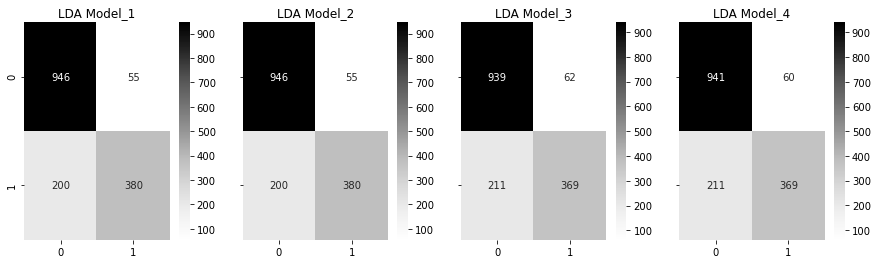

In [155]:
f,a =  plt.subplots(1,4,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_1_LDA_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('LDA Model_1')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_2_LDA_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('LDA Model_2');

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_3_LDA_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][2]);
a[0][2].set_title('LDA Model_3');

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_4_LDA_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][3]);
a[0][3].set_title('LDA Model_4');

In [156]:
print('LDA Model_1')
print(metrics.classification_report(Test['Scholarship'],model_1_LDA_test_class),'\n')

print('LDA Model_2')
print(metrics.classification_report(Test['Scholarship'],model_2_LDA_test_class),'\n')

print('LDA Model_3')
print(metrics.classification_report(Test['Scholarship'],model_3_LDA_test_class),'\n')

print('LDA Model_4')
print(metrics.classification_report(Test['Scholarship'],model_4_LDA_test_class))

LDA Model_1
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      1001
           1       0.87      0.66      0.75       580

    accuracy                           0.84      1581
   macro avg       0.85      0.80      0.81      1581
weighted avg       0.84      0.84      0.83      1581
 

LDA Model_2
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      1001
           1       0.87      0.66      0.75       580

    accuracy                           0.84      1581
   macro avg       0.85      0.80      0.81      1581
weighted avg       0.84      0.84      0.83      1581
 

LDA Model_3
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1001
           1       0.86      0.64      0.73       580

    accuracy                           0.83      1581
   macro avg       0.84      0.79      0.80      1581
weighted avg       0.83      0.83 

In [157]:
#Extraction Metrics : Model 1 test
M1_test=metrics.classification_report(Test['Scholarship'],model_1_LDA_test_class,output_dict=True)
M1test=pd.DataFrame(M1_test).transpose()
M1test_precision=round(M1test.loc["1"][0],2)
M1test_recall=round(M1test.loc["1"][1],2)
M1test_f1=round(M1test.loc["1"][2],2)
print ('M1test_precision ',M1test_precision)
print ('M1test_recall ',M1test_recall)
print ('M1test_f1 ',M1test_f1)


#Extraction Metrics : Model 2 test
M2_test=metrics.classification_report(Test['Scholarship'],model_2_LDA_test_class,output_dict=True)
M2test=pd.DataFrame(M2_test).transpose()
M2test_precision=round(M2test.loc["1"][0],2)
M2test_recall=round(M2test.loc["1"][1],2)
M2test_f1=round(M2test.loc["1"][2],2)
print ('M2test_precision ',M2test_precision)
print ('M2test_recall ',M2test_recall)
print ('M2test_f1 ',M2test_f1)

#Extraction Metrics : Model 3 test
M3_test=metrics.classification_report(Test['Scholarship'],model_3_LDA_test_class,output_dict=True)
M3test=pd.DataFrame(M3_test).transpose()
M3test_precision=round(M3test.loc["1"][0],2)
M3test_recall=round(M3test.loc["1"][1],2)
M3test_f1=round(M3test.loc["1"][2],2)
print ('M3test_precision ',M3test_precision)
print ('M3test_recall ',M3test_recall)
print ('M3test_f1 ',M3test_f1)


#Extraction Metrics : Model 4 test
M4_test=metrics.classification_report(Test['Scholarship'],model_4_LDA_test_class,output_dict=True)
M4test=pd.DataFrame(M4_test).transpose()
M4test_precision=round(M4test.loc["1"][0],2)
M4test_recall=round(M4test.loc["1"][1],2)
M4test_f1=round(M4test.loc["1"][2],2)
print ('M4test_precision ',M4test_precision)
print ('M4test_recall ',M4test_recall)
print ('M4test_f1 ',M4test_f1)


M1test_precision  0.87
M1test_recall  0.66
M1test_f1  0.75
M2test_precision  0.87
M2test_recall  0.66
M2test_f1  0.75
M3test_precision  0.86
M3test_recall  0.64
M3test_f1  0.73
M4test_precision  0.86
M4test_recall  0.64
M4test_f1  0.73


LDA Model 1 AUC: 0.81128


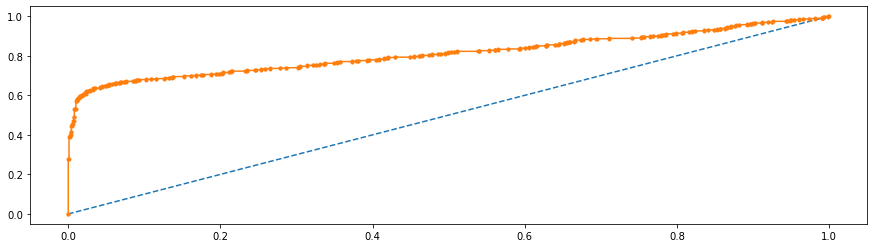

LDA Model 2 AUC: 0.81135


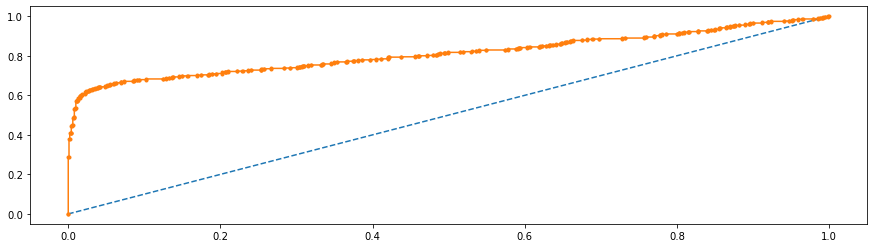

LDA Model 3 AUC: 0.80485


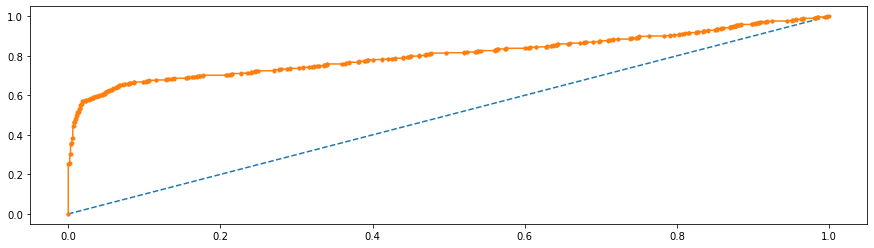

LDA Model 4 AUC: 0.80483


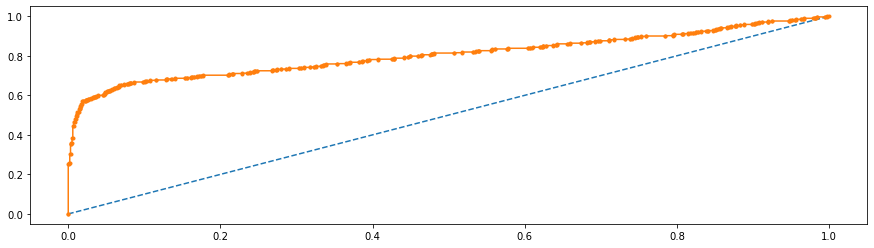

In [158]:
# AUC and ROC for the model 1


# calculating on the basis of a person not defaulting
# calculate AUC
M1_auc = metrics.roc_auc_score(Test['Scholarship'],model_1_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA Model 1 AUC: %.5f' % M1_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
M1_fpr, M1_tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_1_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(M1_fpr, M1_tpr, marker='.')
# show the plot
plt.show()


# AUC and ROC for the model 2


# calculating on the basis of a person not defaulting
# calculate AUC
M2_auc = metrics.roc_auc_score(Test['Scholarship'],model_2_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA Model 2 AUC: %.5f' % M2_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
M2_fpr, M2_tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_2_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(M2_fpr, M2_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the model 3


# calculating on the basis of a person not defaulting
# calculate AUC
M3_auc = metrics.roc_auc_score(Test['Scholarship'],model_3_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA Model 3 AUC: %.5f' % M3_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
M3_fpr, M3_tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_3_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(M3_fpr, M3_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the model 4


# calculating on the basis of a person not defaulting
# calculate AUC
M4_auc = metrics.roc_auc_score(Test['Scholarship'],model_4_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA Model 4 AUC: %.5f' % M4_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
M4_fpr, M4_tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_4_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(M4_fpr, M4_tpr, marker='.')
# show the plot
plt.show()

### Model Comparison LDA : Metrics , ROC, AUC

In [159]:
#Metrics Comparison
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
Summary = pd.DataFrame({'LDA Model 1':[M1_acc,M1_auc,M1test_recall,M1test_precision,M1test_f1],
        'LDA Model 2':[M2_acc,M2_auc,M2test_recall,M2test_precision,M2test_f1],
       'LDA Model 3':[M3_acc,M3_auc,M3test_recall,M3test_precision,M3test_f1],
        'LDA Model 4':[M4_acc,M4_auc,M4test_recall,M4test_precision,M4test_f1]},index=index)
round(Summary,3)

,LDA Model 1,LDA Model 2,LDA Model 3,LDA Model 4
Accuracy,0.843,0.842,0.834,0.834
AUC,0.811,0.811,0.805,0.805
Recall,0.660,0.660,0.640,0.640
Precision,0.870,0.870,0.860,0.860
F1 Score,0.750,0.750,0.730,0.730


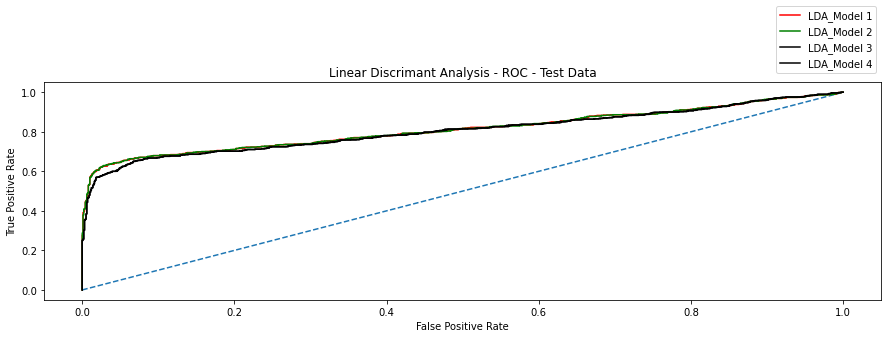

In [160]:
#ROC  and AUC
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(M1_fpr, M1_tpr,color='red',label="LDA_Model 1")
plt.plot(M2_fpr,M2_tpr,color='green',label="LDA_Model 2")
plt.plot(M3_fpr,M3_tpr,color='black',label="LDA_Model 3")
plt.plot(M4_fpr,M4_tpr,color='black',label="LDA_Model 4")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear Discrimant Analysis - ROC - Test Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### Model Comparison : Metrics , ROC, AUC

# END